# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

In [1]:
#Импорт библиотек, используемых в проекте

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
#Загрузка файла

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
#Общая информация: Тип данных по колонкам, пропущенные значения

data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

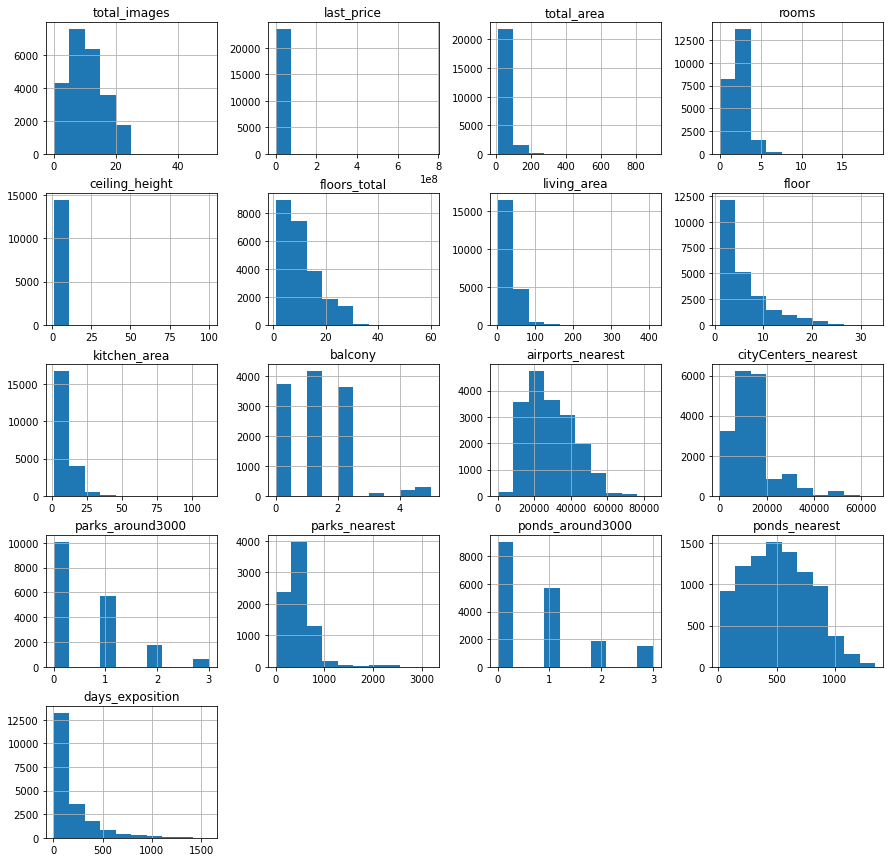

In [4]:
#Диаграммы вставлены только из-за задания: "Постройте общую гистограмму для всех числовых столбцов таблицы"
#Логическим же их расположением является 4 раздел

data.hist(figsize=(15, 15))

## Предобработка данных

### Анализ пропущенных значений

In [5]:
data.isna().sum() #Число пропущенных значений

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
data.isna().sum()/len(data)*100 #Процент пропущенных значений от общего числа строк

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Датасет состоит из **23699** строк, пропущенные значения есть в 14 столбцах из 22.


| Колонка | Ед. изм | Описание | Пропущено | % от общего | Принцип замены |
|---|---|---|---|---|---|
| total_images | число | всего изображений | Нет | - | - |
| last_price | рубли | последняя цена | Нет | - | - |
| total_area | м2 | общая площадь | Нет | - | - |
| first_day_exposition | дата/время | день размещения объявления | Нет | - | - |
| rooms | число | количество комнат | Нет | - | - |
| ceiling_height | м | высота потолков | 9195 | 38.8 | Группировка по локации, медиана |
| floors_total | м2 | всего этажей в доме | 86 | 0.3 | **Удаление** |
| living_area | м2 | площадь жилых помещений | 1903 | 8 | Группировка по комнатам, медиана |
| floor | число | этаж, на котором расположена квартира | Нет | - | - |
| is_apartment | булев тип | статус квартира / аппартаменты | 20924 | 88.2 | **Без изменений** |
| studio | булев тип | статус студия / не студия | Нет | - | - |
| open_plan | булев тип | статус свободная планировка / нет | Нет | - | - |
| kitchen_area | м2 | площадь кухни | 2278 | 9.6 | Соотношение общей площади, жилой и площади ванных комнат |
| balcony | число | количество балконов | 11517 | 48.6 | **Без изменений** |
| locality_name | текст | название локации, где расположена квартира | 49 | 0.2 | **Удаление** |
| airports_nearest | м | расстояние до ближайшего аэропорта | 5542 | 23.3 | Группировка по локации, медиана |
| cityCenters_nearest | м | расстояние до центра города | 5519 | 23.2 | Группировка по локации, медиана |
| parks_around3000 | число | количество парков в пределах 3 км | 5518 | 23.2 | Группировка по локации, медиана |
| parks_nearest | м | расстояние до ближайшего парка | 15620 | 65.9 | Группировка по локации, медиана |
| ponds_around3000 | число | количество водоёмов в пределах 3 км | 5518 | 23.2 | Группировка по локации, медиана |
| ponds_nearest | м | расстояние до ближайшего водоёма | 14589 | 61.6 | Группировка по локации, медиана |
| days_exposition | число | количество дней между датой начала публикации объявления и датой закрытия объявления | 3181 | 13.4 | **Без изменений** |






Принцип замены пропусков:
- Пропуски в locality_name будут удалены построчно, т.к. их число составляет 0,2% и не влияет на общую картину
- Пропуски, которые составляют менее 1% от общего числа будут удалены, т.к. такой процент влияет незначительно на общую картину по данным.
- Пропуски в balcony, days_exposition, is_apartment останутся без изменений, т.к.:
 - Количество балконов связано с ЖК, о которых неизвестно. Могут быть студии с балконом и без, может быть 3 комнаты и 1 балкон или 3 комнаты и совмещённая лоджия, учитываемая как 2 балкона. Замена на 0 будет некорректна, также как и привязка к количеству комнат
 - Количество дней существования объявления не может быть заменено по причине отсутствия даты снятия объявления. Медиана или среднее количество будет слишком приблизительным, потому как на решение о покупке значительное влияние может оказывать внешний вид квартиры (ремонт, наличие мебели и пр.), а также неучтённые характеристики датасета: расстояние до ближайшей станции метро и инфраструктура. В инфраструктуре для покупателей могут быть важными детские сады, школы, больницы, крупные торговые сети. Резюмируя, в одном и том же доме квартира с хорошим ремонтом может быть продана условно за 30 дней, а квартира с чистовой отделкой - за 60.
 - Статус аппартаментов не может быть рассчитан, т.к аппартаментами могут быть как новые помещения в составе инвест-отелей, так и вторичное жилье, где кадастровая служба не разрешает присвоение жилого помещения в случае реорганизации нежилого фонда или при перепланировке отдельных комнат как студии. Таким образом ни количество комнат, ни жилая площадь, ни локация не дадут точного представления о том, что помещение имеет статус квартиры или аппартаментов
- Остальные пропуски будут обработаны через группировку по сегментам и медиану:
 - Медиана расстояний связана с размером локаций, например, Эрмитаж находится в Санкт-Петербурге, однако даже в пределах города от станции метро Спасская до Эрмитажа 2 км, а от станции метро Дунайская - 14 км.
- Площадь кухни будет рассчитываться через отношение между жилой площадью и общей
 - Расчёт приблизителен, так как площадь кухни зависит больше от типа квартиры, о котором неизвестно. Например, типовая кухня в сталинке серии 1-255 для 1-комнатной квартиры составляет 6,8 кв.м, а типовая кухня 1-комнатной квартиры в сталинке серии 1-433 уже 8,3 кв.м. Сказать, что медиана для 1-комнатных будет около 7 кв.м нельзя, т.к. для 3-комнатных сталинок серии 1-255 типовые кухни 7,1 кв.м, а для сталинок серии 1-411 площадь кухни 7,8 кв.м вне зависимости от количества комнат. Следует также помнить, что дома в Ленинградской области продаются не только в серийных "сталинках", но и в "хрущевках", "брежневках", а также местами в переделанных купеческих домах, где кухни были уже по желанию владельцев, а не по нормативам. Таким образом, медиана по количеству комнат и жилой площади будет слишком приблизительной для оценки площади кухни.

#### Локации

Столбец locality_name является одним из важных столбцов для замены пустых значений, так как по нему можно построить приблизительные расстояния до объектов и их количество.

Для корректной работы циклов по замене значений требуется убедиться, что локации срабатывают правильно:
- Нет пустых значений
- Нет дубликатов

In [7]:
#Удаление строк с неизвестной локацией и сброс индексов

data.dropna(subset=['locality_name'], inplace=True)
data = data.reset_index(drop=True)

In [8]:
#Проверка, что пропущенных значений в локациях нет

print(data['locality_name'].isna().sum())

0


In [9]:
#Извлекаем все названия локаций в отдельный столбец

name = data['locality_name'].astype('string') 
only_locality_name = []

for n in name:
    new_value = re.findall(r"([а-я]*[А-Я].*)$", n)
    only_locality_name.append(new_value)    
    
data['only_locality_name'] = np.asarray(only_locality_name)

In [10]:
#Проверка извлечённых значений: индексы совпадают, количество строк совпадает, разделение по заглавной букве успешно

display(data[['locality_name', 'only_locality_name']])

,locality_name,only_locality_name
0,Санкт-Петербург,Санкт-Петербург
1,посёлок Шушары,Шушары
2,Санкт-Петербург,Санкт-Петербург
3,Санкт-Петербург,Санкт-Петербург
4,Санкт-Петербург,Санкт-Петербург
...,...,...
23645,Санкт-Петербург,Санкт-Петербург
23646,Тосно,Тосно
23647,село Рождествено,Рождествено
23648,Санкт-Петербург,Санкт-Петербург


In [11]:
#Проверка, что пропущенных значений в новом столбце локаций нет

print(data['only_locality_name'].isna().sum())

0


In [12]:
#Проверка уникальных значений списка. Их 305 и повторов среди значений нет

data['only_locality_name'].unique().tolist()

['Санкт-Петербург',
 'Шушары',
 'Янино-1',
 'Парголово',
 'Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'Кудрово',
 'Коммунар',
 'Колпино',
 'Красный Бор',
 'Гатчина',
 'Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'Новое Девяткино',
 'Металлострой',
 'Лебяжье',
 'Сиверский',
 'Молодцово',
 'Кузьмоловский',
 'Новая Ропша',
 'Павловск',
 'Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'Куттузи',
 'Аннино',
 'Ефимовский',
 'Плодовое',
 'Заклинье',
 'Торковичи',
 'Первомайское',
 'Красное Село',
 'Понтонный',
 'Сясьстрой',
 'Старая',
 'Лесколово',
 'Новый Свет',
 'Сланцы',
 'Путилово',
 'Ивангород',
 'Шлиссельбург',
 'Никольское',
 'Зеленогорск',
 'Сосновый Бор',
 'Оржицы',
 'Кальтино',
 'Романовка',
 'Бугры',
 'Рощино',
 'Кириши',
 'Луга',
 'Волосово',
 'Отрадное',
 'Павлово',
 'Оредеж',
 'Копорье',
 'Молодёжное',
 'Тихвин',
 'Победа',
 'Нурма',
 'Синявино',
 'Тосно',
 'Стрельна',
 'Бокситогорск',
 'Александровская',
 'Лопухинка'

#### Количество этажей

Пропущенных значений с количеством этажей менее 1%, поэтому данные строки будут удалены.

In [13]:
#Удаление строк с неизвестным количеством этажей и сброс индексов

data.dropna(subset=['floors_total'], inplace=True)
data = data.reset_index(drop=True)

In [14]:
#Проверка, что пропущенных значений в количестве этажей нет

print(data['floors_total'].isna().sum())

0


#### Расстояния до аэропорта, парка, водоёма, центра

Пропуски заменяются следующим образом:
- Пропуск в случае, когда значения нельзя высчитать логически
- Замена медианами для случаев, когда в группах есть хотя бы одно значение

В некоторых строках датасета может быть до 9 пустых полей, что вызывает ошибку при расчёте медиан. Для таких значений будут выставлены медианы по всему столбцу.

In [15]:
#Замена пропусков на медианы через циклы

'''
Касательно try/except:
try отвечает за строки, где есть хоть какое-то значение в срезе
except должен игнорировать ошибки типа "Пустой срез данных" и заставляет цикл продолжить работу
'''

#Медианы для расстояний аэропортов, водоёмов, центра, парков на базе локации
for d in data['only_locality_name'].unique():
    try:
        data.loc[(data['only_locality_name'] == d) & (data['airports_nearest'].isna()), 'airports_nearest'] = data.loc[(data['only_locality_name'] == d), 'airports_nearest'].median()
        data.loc[(data['only_locality_name'] == d) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = data.loc[(data['only_locality_name'] == d), 'ponds_nearest'].median()
        data.loc[(data['only_locality_name'] == d) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = data.loc[(data['only_locality_name'] == d), 'cityCenters_nearest'].median()
        data.loc[(data['only_locality_name'] == d) & (data['parks_nearest'].isna()), 'parks_nearest'] = data.loc[(data['only_locality_name'] == d), 'parks_nearest'].median()
    except:
        warnings.filterwarnings('ignore', message='Mean of empty slice', category=RuntimeWarning)
        pass


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

Для упрощения условные значения для расстояний до центра города, аэропорта, парков и водоёмов выведены в отдельную переменную с окончанием dist_std:
- **dist** - distance - расстояние
- **std** - standart - стандартное значение, значение по умолчанию

Отдельные переменные помогут без проблем изменить метод расчёта условной замены для пропущенных значений, если понадобится заменить пропущенные значения не медианой, а модальным значением или средним.

In [16]:
#Медианы по столбцам для тех случаев, когда во всём сегменте нет ни одного заполненного значения

airports_dist_std = data['airports_nearest'].median()
cityCenters_dist_std = data['cityCenters_nearest'].median()
ponds_dist_std = data['ponds_nearest'].median()
parks_dist_std = data['parks_nearest'].median()

In [17]:
#Убеждаемся, что цикл не смог обработать весь массив данных и оставил пустые поля

print('Пустых полей в расстоянии до аэропорта',data['airports_nearest'].isna().sum())
print('Пустых полей в расстоянии до центра города',data['cityCenters_nearest'].isna().sum())
print('Пустых полей в расстоянии до водоёма',data['ponds_nearest'].isna().sum())
print('Пустых полей в расстоянии до парка',data['parks_nearest'].isna().sum())

Пустых полей в расстоянии до аэропорта 5432
Пустых полей в расстоянии до центра города 5432
Пустых полей в расстоянии до водоёма 5517
Пустых полей в расстоянии до парка 5986


In [18]:
#Замена всех нулевых значений в расстояниях на медиану

data.loc[:,'airports_nearest'] = data.loc[:,'airports_nearest'].fillna(airports_dist_std)
data.loc[:,'cityCenters_nearest'] = data.loc[:,'cityCenters_nearest'].fillna(cityCenters_dist_std)
data.loc[:,'ponds_nearest'] = data.loc[:,'ponds_nearest'].fillna(ponds_dist_std)
data.loc[:,'parks_nearest'] = data.loc[:,'parks_nearest'].fillna(parks_dist_std)

In [19]:
#Убеждаемся, что в расстояниях не осталось пустых полей

print('Пустых полей в расстоянии до аэропорта',data['airports_nearest'].isna().sum())
print('Пустых полей в расстоянии до центра города',data['cityCenters_nearest'].isna().sum())
print('Пустых полей в расстоянии до водоёма',data['ponds_nearest'].isna().sum())
print('Пустых полей в расстоянии до парка',data['parks_nearest'].isna().sum())

Пустых полей в расстоянии до аэропорта 0
Пустых полей в расстоянии до центра города 0
Пустых полей в расстоянии до водоёма 0
Пустых полей в расстоянии до парка 0


Медианы должны были проставиться в тех случаях, когда у населённого пункта нет ни одного заполненного значения в любой из строк. Например, такое есть в локациях Тосно, Новый Учхоз, Янино-1 и т.д.

Однако, для того, чтобы окончательно убедиться, что медианы действительно находится на своём месте, добавлена дополнительная прямая проверка на Тосно:
- Сколько всего строк по локации Тосно
- Как обработались значения в полностью пустом столбце
- Остались ли на месте значения за пределами колонок расстояния

In [20]:
#Проверка пропущенных значений

print("Сколько строк с указанием Тосно?\n", data.query('only_locality_name == "Тосно"').groupby(by='only_locality_name').size(), "\n")

print("Сколько заполнено строк с ближайшими аэропортами в Тосно?\n", data.query('only_locality_name == "Тосно"').groupby(by='airports_nearest').size(), "\n")

print("Сколько заполнено строк с балконами в Тосно?\n", data.query('only_locality_name == "Тосно"').groupby(by='balcony').size().sum(), "\n")

Сколько строк с указанием Тосно?
 only_locality_name
Тосно    104
dtype: int64 

Сколько заполнено строк с ближайшими аэропортами в Тосно?
 airports_nearest
26763.0    104
dtype: int64 

Сколько заполнено строк с балконами в Тосно?
 60 



Проверка пройдена:
- В Тосно есть 104 строки и ни в одной из них нет значения для расчёта медиан
- Поэтому все 104 строки были заменены на медианное значение всего столбца расстояний
- При этом за пределами столбца расстояния данные не перезаписаны, что видно по количеству колонки с балконами: из 104 строк Тосно заполнено только 60

#### Количество парков и водоёмов

Пропуски будут заполнены медианами через группировку по локации, а в случае, если в сегменте нет ни одного значения для расчёта - будет поставлен 0.

In [21]:
#Медианы для количества водоёмов и парков   
for d in data['only_locality_name'].unique():
    try:
        data.loc[(data['only_locality_name'] == d) & (data['parks_around3000'].isna()), 'parks_around3000'] = data.loc[(data['only_locality_name'] == d), 'parks_around3000'].median()
        data.loc[(data['only_locality_name'] == d) & (data['ponds_around3000'].isna()), 'ponds_around3000'] = data.loc[(data['only_locality_name'] == d), 'ponds_around3000'].median()
    except:
        warnings.filterwarnings('ignore', message='Mean of empty slice', category=RuntimeWarning)
        pass

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [22]:
data.loc[:,'parks_around3000'] = data.loc[:,'parks_around3000'].fillna(0)
data.loc[:,'ponds_around3000'] = data.loc[:,'parks_around3000'].fillna(0)

In [23]:
#Убеждаемся, что в количестве парков и водоёмов не осталось пустых полей

print('Пустых полей в количестве парков',data['parks_around3000'].isna().sum())
print('Пустых полей в количестве водоёмов',data['ponds_around3000'].isna().sum())

Пустых полей в количестве парков 0
Пустых полей в количестве водоёмов 0


#### Высота потолков

Пропущенные значения высоты потолков будут заполнены также через группировку по локации, а в случаях с полностью пустым срезом данных - заменены на стандартное значение потолков в 2.7 м.

In [24]:
#Медианы для высоты потолков на базе общей площади квартиры
for d in data['only_locality_name'].unique():
    try:
        data.loc[(data['only_locality_name'] == d) & (data['ceiling_height'].isna()), 'ceiling_height'] = data.loc[(data['only_locality_name'] == d), 'ceiling_height'].median()
    except:
        warnings.filterwarnings('ignore', message='Mean of empty slice', category=RuntimeWarning)
        pass

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [25]:
data.loc[:,'ceiling_height'] = data.loc[:,'ceiling_height'].fillna(2.7)

In [26]:
#Убеждаемся, что высоты потолков заполнены

print('Пустых полей в высоте потолков',data['ceiling_height'].isna().sum())

Пустых полей в высоте потолков 0


#### Жилая площадь

Пропуски жилой площади будут заменены через медианы комнат, так как:
- жилая площадь - это именно жилые комнаты, то есть параметр не должен учитывать подсобные помещения, балконы, лоджии, ванные комнаты, площадь кухни, кладовые помещения
- значения общей площади неоднозначны, в то время как комнаты уже являются готовыми группами

In [27]:
#Медианы для жилплощади на базе количества комнат
for d in data['rooms'].unique():
    try:
        data.loc[(data['rooms'] == d) & (data['living_area'].isna()), 'living_area'] = data.loc[(data['rooms'] == d), 'living_area'].median()
    except:
        warnings.filterwarnings('ignore', message='Mean of empty slice', category=RuntimeWarning)
        pass

In [28]:
#Убеждаемся, что колонка жилой площади заполнена

print('Пустых полей в значениях жилой площади',data['living_area'].isna().sum())

Пустых полей в значениях жилой площади 0


#### Площадь кухни

In [29]:
#Расчёт условных долей жилой площади к общей

data['kitchen_area_std'] = data['living_area'] / data['total_area'] * 100

data['kitchen_area_std'].describe()

count    23565.000000
mean        56.403092
std         11.085973
min          2.158273
25%         49.071618
50%         56.666667
75%         63.829787
max        151.547619
Name: kitchen_area_std, dtype: float64

Минимум и максимум полученных долей выглядят аномально, но значения уровня 25-75% вполне релевантны. В среднем жилая площадь занимает в квартирах от 49% до 64%.

Стандартное значение ванной комнаты - 3.75 кв.м, значение остальных нежилых помещений оценить сложно, т.к. не во всех квартирах указаны балконы и ни в одной не указано наличие дополнительных помещений.

In [30]:
#Расчёт примерной доли ванной комнаты к общей площади

data['bathroom_area_std'] = 3.75 / data['total_area'] * 100

data['bathroom_area_std'].describe()

count    23565.000000
mean         7.494797
std          2.853789
min          0.416667
25%          5.380201
50%          7.211538
75%          9.375000
max         31.250000
Name: bathroom_area_std, dtype: float64

Так как количество пропущенных значений в кухонных площадях составляет менее 10%, то для замены достаточно приблизительных значений. Дополнительно учитывается, что рекомендуемый размер кухни составляет 20 кв.м

Итоговый метод расчёта следующий:
- Общая площадь - 100%
- Средняя площадь жилых комнат 57%, средняя площадь ванных комнат 7%. Итого 64%
- Таким образом, условная площадь кухни будет составлять 36% от общей площади
- При превышении доли кухни рекомендуемого размера значение будет приведено к 20 кв.м

In [31]:
#Создание колонки для расчёта площади кухни
data['kitchen_part'] = data['total_area'] * 0.36
data.loc[data['kitchen_part'] > 20, 'kitchen_part'] = 20

In [32]:
#Перезаписываем в пустые значения площади кухни параметры из столбца с долей кухни
data.loc[:,'kitchen_area'] = data.loc[:,'kitchen_area'].fillna(data['kitchen_part'])

In [33]:
#Удаляем рабочие столбцы, в которых считались условные доли
data.pop('kitchen_area_std')
data.pop('bathroom_area_std')
data.pop('kitchen_part')

#Проверяем отсутствие пропущенных значений
print('Пустых полей в значениях площади кухни',data['kitchen_area'].isna().sum())

Пустых полей в значениях площади кухни 0


#### Результат после замены пропусков

Пропущенные значения остались, однако их стало гораздо меньше и сохранились они только в 3 столбцах, которые изначально было решено оставить без изменений.

In [34]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11475
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest               0
ponds_around3000            0
ponds_nearest               0
days_exposition          3171
only_locality_name          0
dtype: int64

### Типы данных

Некоторые типы данных не совпадают с ожидаемыми, например, balcony записаны как object, а не как целое число, количество водоёмов и парков записаны как float64, а не как целые числа.

In [35]:
data.dtypes #Проверка типов

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
only_locality_name       object
dtype: object

Замена типов осуществляется в соответствии с записанными данными.

| Колонка | Тип датасета | Ожидаемый тип | Обоснование замены |
|---|---|---|---|
| total_images | int64 | int64 | - |
| last_price | float64 | int64 | Цена может быть в копейках, но в датасете таких значений нет |
| total_area | float64 | float64 | - |
| first_day_exposition | object | datetime64[ns] | Для времени в библиотеке есть формат даты |
| rooms | int64 | int64 | - |
| ceiling_height | float64 | float64 | - |
| floors_total | object | Int64 | Полтора этажа быть не может |
| living_area | float64 | float64 | - |
| floor | int64 | int64 | - |
| is_apartment | object | bool | Значение да/нет - логическое |
| studio | bool | bool | - |
| open_plan | bool | bool | - |
| kitchen_area | float64 | float64 | - |
| balcony | object | Int64 | Полтора балкона быть не может |
| locality_name | object | object | - |
| airports_nearest | float64 | float64 | - |
| cityCenters_nearest | float64 | float64 | - |
| parks_around3000 | float64 | Int64 | Полтора парка не может быть, может быть 1 парк и 1 сквер |
| parks_nearest | float64 | float64 | - |
| ponds_around3000 | float64 | Int64 | То же, что и с парками |
| ponds_nearest | float64 | float64 | - |
| days_exposition | object | Int64 | Дни могут быть выражены целым числом или дробным, но т.к. в датасете число меньше десятой доли, выбрано целое число |
| only_locality_name | object | object | - |

In [36]:
#Замена типов

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

data['floors_total'] = pd.to_numeric(data['floors_total'], errors = 'coerce')
data['balcony'] = pd.to_numeric(data['balcony'], errors = 'coerce')
data['days_exposition'] = round(pd.to_numeric(data['days_exposition'], errors = 'coerce'))

data = data.astype({'floors_total': 'Int64', 'balcony':'Int64', 'last_price': 'Int64', 'parks_around3000':'Int64', 'ponds_around3000': 'Int64', 'is_apartment': 'bool', 'days_exposition': 'Int64'}, errors="ignore")

data.dtypes

total_images                     int64
last_price                       Int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     Int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          Int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 Int64
parks_nearest                  float64
ponds_around3000                 Int64
ponds_nearest                  float64
days_exposition                  Int64
only_locality_name              object
dtype: object

### Аномалии

In [37]:
#Оценка минимальных, максимальных значений и медианы по колонкам

data.agg(['min', 'max', 'median'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,only_locality_name
min,0.0,12190.0,12.0,2014-11-27,0.0,1.0,1.0,2.0,1.0,False,...,0.0,Бокситогорск,0.0,181.0,0.0,1.0,0.0,13.0,1.0,Агалатово
max,50.0,763000000.0,900.0,2019-05-03,19.0,100.0,60.0,409.7,33.0,True,...,5.0,село Шум,84869.0,65968.0,3.0,3190.0,3.0,1344.0,1580.0,Янино-1
median,9.0,4646000.0,52.0,2017-12-12,2.0,2.7,9.0,30.3,4.0,1.0,...,1.0,NaN,26763.0,13073.0,0.0,460.0,0.0,504.0,95.0,NaN


Не аномальные значения:
- Количество изображений: в датасете оно растёт равномерно, но при этом следует уточнить сколько действительно фотографий можно загружать на сайт
- Дата размещения объявления
- Жилая площадь - квартиры с площадью 400 кв.м действительно есть в продаже, цифра не выглядит завышенной
- Количество этажей - 60 этажей допустимо для нежилых офисных помещений, жилые дома чаще до 25 этажей. Иногда, как в некоторыз московских ЖК, могут быть на 33 этажа, но это, скорее, исключение
- Балконы - да, в квартире может не быть балконов совсем или быть 5, если это многокомнатная двухуровневая квартира
- Расстояние до аэропорта - да, может быть свыше 80 км
- Расстояние до центра - да, может быть свыше 65 км. Относится к посёлку Молодёжное

Значения, которые требуют проверки:
- Последняя цена - 763 млн за квартиру, а медиана в 4 млн. Также стоимость в 12 тысяч кажется ошибочной
- Общая площадь - 900 кв.м похоже на отдельный дом, но не квартиру, а вот 12 кв.м могут быть в случаях, когда многокомнатную квартиру переделывают в студии.
- Жилая площадь - 2 кв.м выглядят как ошибочное значение, это очень маленькое помещение
- Комнаты - 19 комнат могут быть при перепланировке нежилых помещений в аппартаменты, но если позволяет площадь. 0 комнат же быть не может
- Высота потолков - максимально допустимая в домах премиум-класса составляет 10 метров, так что значение в 100 выглядит ошибочным. Также как и значение в 1 метр, т.к. это даже ниже стандартного человеческого роста
- Этаж - 33 может быть, такие дома есть в Москве. Однако, для домов Санкт-Петербурга стоит проверить, т.к. вторичное жильё обычно меньшей этажности
- Расстояние  до парка - 1 метр выглядит сомнительно, потому что по СанПин расстояние от ствола дерева до стены многоквартирного дома должно составлять 5 метров
- Дней активности объявления - 1580, что равняется примерно 4 годам. Возможно, но стоит проверить

#### Колонка "Последняя цена"

Для проверки значений максимальной последней цены нужно узнать сколько квартир продаётся дороже 400 млн и какими они обладают параметрами. Порог в 400 млн выбран по той причине, что квартир стоимостью больше медианы довольно много, при этом 37 квартир стоят дороже 100 млн. Так что если выбрать среднее между 100 млн и 700 млн, то получится 400 млн, по которым легко сравнить характеристики.

Для проверки значения минимальной цены нужно посмотреть есть ли предложения стоимостью менее 100 тысяч, а также по какой стоимости продаются квартиры той же комнатности и в той же локации.

In [38]:
#Проверка последней цены

display(data.query('last_price > 400000000').sort_values(by='total_area'))

display(data.query('last_price < 100000').sort_values(by='total_area'))

display(data.query('last_price < 2000000 and rooms == 2 and locality_name == "Санкт-Петербург"').sort_values(by='total_area'))

display(data.query('rooms == 2 and locality_name == "Санкт-Петербург" and total_area > 100').agg(['max', 'median']))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,only_locality_name
12897,19,763000000,400.0,2017-09-30,7,2.7,10,250.0,10,True,...,2,Санкт-Петербург,25108.0,3956.0,1,530.0,1,756.0,33,Санкт-Петербург
14621,15,401300000,401.0,2016-02-20,5,2.7,9,204.0,9,False,...,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,393,Санкт-Петербург
19431,8,420000000,900.0,2017-12-06,12,2.8,25,409.7,25,True,...,<NA>,Санкт-Петербург,30706.0,7877.0,0,460.0,0,318.0,106,Санкт-Петербург


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,only_locality_name
8750,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,True,...,<NA>,Санкт-Петербург,36421.0,9176.0,1,805.0,1,504.0,8,Санкт-Петербург


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,only_locality_name
16047,0,1900000,41.0,2018-02-01,2,2.50,5,30.5,5,True,...,<NA>,Санкт-Петербург,42774.0,15277.0,1,448.0,1,504.0,36,Санкт-Петербург
8750,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,True,...,<NA>,Санкт-Петербург,36421.0,9176.0,1,805.0,1,504.0,8,Санкт-Петербург


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,only_locality_name
max,20.0,289238400.0,196.0,2019-04-22,2.0,3.60,25.0,85.0,25.0,True,...,4.0,Санкт-Петербург,51030.0,20802.0,3.0,2467.0,3.0,840.0,1391.0,Санкт-Петербург
median,12.0,17583640.0,111.0,2017-10-31,2.0,2.75,7.0,47.1,4.0,1.0,...,1.0,NaN,26243.5,5740.5,1.0,460.0,1.0,504.0,158.0,NaN


Проверка последней цены показала, что максимальное значение выглядит релевантным и не является аномальным. 

Минимум же явно ошибочен и не может быть 12 тысяч. Квартира находится в Санкт-Петербурге и имеет площадь 109 кв.м, что почти втрое больше, чем у единственной двухкомнатной квартиры стоимостью дешевле 2 млн. Таким образом, стоимость не может быть и 1,2 млн. 
Если посмотреть срез по двухкомнатным квартирам Санкт-Петербурга с площадью от 100 кв.м, то медиана находится на уровне 5,6 млн, а максимум достигает 289 млн. Поэтому стоимость квартиры может быть как 12 млн, так и 120 млн. К медианному ближе 12 млн, поэтому замена аномального значения будет осуществлена именно на это число.

In [39]:
#Замена ошибочного минимума последней цены, проверка, что новый минимум не аномален

data['last_price'] = data['last_price'].replace(12190, 1219000)

data['last_price'].sort_values()[:5]

14825    430000
17359    430000
16185    440000
5670     450000
16130    450000
Name: last_price, dtype: Int64

#### Колонка "Общая площаь"

Проверка общей площади, где максимум был 900 кв.м, а минимум 12 кв.м

Проверим есть ли квартиры площадью более 500 кв.м и менее 15 кв.м

In [40]:
#Проверка общей площади

display(data.query('total_area > 500').sort_values(by='living_area'))

display(data.query('total_area < 15').sort_values(by='locality_name'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,only_locality_name
3103,19,140000000,631.0,2019-03-30,7,2.70,5,145.0,5,True,...,<NA>,Санкт-Петербург,25707.0,4972.0,0,460.0,0,210.0,<NA>,Санкт-Петербург
15565,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,True,...,<NA>,Санкт-Петербург,32440.0,5297.0,0,460.0,0,198.0,111,Санкт-Петербург
7977,20,84000000,507.0,2015-12-17,5,4.45,7,301.5,7,True,...,1,Санкт-Петербург,26763.0,5735.0,2,110.0,2,504.0,1078,Санкт-Петербург
12787,20,140000000,631.2,2019-04-09,7,3.90,4,322.3,4,True,...,1,Санкт-Петербург,25707.0,4972.0,0,460.0,0,210.0,<NA>,Санкт-Петербург
4216,1,50000000,517.0,2017-10-14,7,2.70,4,332.0,3,True,...,<NA>,Санкт-Петербург,22835.0,1847.0,2,477.0,2,540.0,<NA>,Санкт-Петербург
5330,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,True,...,<NA>,Санкт-Петербург,24447.0,4666.0,1,767.0,1,504.0,14,Санкт-Петербург
19431,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,True,...,<NA>,Санкт-Петербург,30706.0,7877.0,0,460.0,0,318.0,106,Санкт-Петербург


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,only_locality_name
17859,3,1400000,13.0,2017-12-03,1,2.60,9,17.6,1,True,...,<NA>,Санкт-Петербург,14350.0,15945.0,0,460.0,0,185.0,410,Санкт-Петербург
19437,3,1850000,13.0,2019-03-11,1,3.40,5,17.6,2,False,...,<NA>,Санкт-Петербург,24915.0,5483.0,1,644.0,1,504.0,24,Санкт-Петербург
19449,2,1686000,13.2,2018-12-17,1,2.70,5,17.6,1,True,...,<NA>,Санкт-Петербург,19891.0,4165.0,1,361.0,1,155.0,19,Санкт-Петербург
19533,5,1190000,14.0,2018-07-29,1,2.70,5,11.0,1,True,...,<NA>,Санкт-Петербург,9898.0,11122.0,0,460.0,0,504.0,4,Санкт-Петербург
19698,0,3800000,13.0,2018-07-04,1,2.70,5,10.0,3,True,...,<NA>,Санкт-Петербург,21302.0,1242.0,1,592.0,1,27.0,9,Санкт-Петербург
19795,4,2400000,12.0,2017-07-19,1,2.55,5,10.0,2,True,...,<NA>,Санкт-Петербург,21314.0,964.0,1,886.0,1,45.0,200,Санкт-Петербург


Квартира с показателем максимальной площади с точки зрения стоимости, количества комнат и локации выглядит релевантно. Однако, стоит дополнительно посмотреть фотографии, так как жилая площадь составляет 409 кв.м, а значит почти 490 кв.м являются нежилыми. Такой разброс возможен, например, в датасете есть квартира с площадью 631 кв.м, из которых жилой 145 кв.м, но стоит проверить дополнительно.

Квартира с показателем минимальной площади оказалась не аномальной, в Санкт-Петербурге есть похожие квартиры с той же жилой площадью 10-11 кв.м и общей площадью менее 15 кв.м

#### Колонка "Жилая площадь"

Что касается жилой площади, то её минимальное значение составляет 2 кв.м и это является очень маленьким помещением. Для проверки посмотрим какая общая площадь квартир.

Квартиры с жилой площадью 6 кв.м при общей свыше 30 выглядят нерелевантно, однако их истинные значения без дополнительных данных высчитать нельзя. Для квартир с площадью 2 и 3 кв.м значения можно увеличить в 10 раз и это будет вполне соответствовать общей площади.

In [41]:
#Проверка жилой площади

display(data.query('living_area < 10').sort_values(by='living_area'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,only_locality_name
21634,0,2330000,23.00,2018-01-01,0,2.70,24,2.0,22,True,...,<NA>,посёлок Мурино,26763.0,13073.0,0,460.0,0,504.0,66,Мурино
13837,20,6350000,52.00,2018-02-06,2,3.00,6,2.0,2,True,...,<NA>,Санкт-Петербург,32453.0,6521.0,0,460.0,0,1012.0,91,Санкт-Петербург
23442,14,64990000,139.00,2015-11-24,3,3.00,8,3.0,8,True,...,1,Санкт-Петербург,33255.0,5975.0,1,630.0,1,100.0,280,Санкт-Петербург
3228,7,4440000,41.00,2017-07-02,1,2.70,17,3.0,17,True,...,<NA>,Санкт-Петербург,19272.0,13073.0,0,460.0,0,504.0,216,Санкт-Петербург
17483,11,2680000,22.00,2018-08-11,0,2.70,25,5.0,8,True,...,2,Санкт-Петербург,22735.0,11618.0,1,835.0,1,652.0,70,Санкт-Петербург
21818,15,6100000,77.60,2019-02-28,4,2.50,9,5.4,1,True,...,<NA>,Санкт-Петербург,29338.0,11270.0,1,584.0,1,504.0,33,Санкт-Петербург
16342,13,3799000,31.00,2018-04-12,1,2.60,5,6.0,1,True,...,<NA>,Санкт-Петербург,32177.0,4826.0,1,430.0,1,504.0,168,Санкт-Петербург
19144,19,4050000,33.00,2018-10-15,1,2.50,22,6.5,21,True,...,<NA>,Санкт-Петербург,9258.0,10592.0,1,458.0,1,504.0,44,Санкт-Петербург
20877,7,8900000,50.60,2018-10-22,2,2.50,7,8.0,3,True,...,<NA>,Санкт-Петербург,12771.0,8301.0,1,173.0,1,126.0,<NA>,Санкт-Петербург
23077,12,4800000,37.00,2016-02-24,1,2.70,14,8.0,11,True,...,0,Санкт-Петербург,27838.0,12387.0,2,358.0,2,950.0,139,Санкт-Петербург


In [42]:
#Замена квартир площадью меньше 4 кв.м и одной 5.4, т.к её общая площадь позволяет увеличение

data.loc[data['living_area'] < 4, 'living_area'] =  data.loc[data['living_area'] < 4, 'living_area'] * 10
data['living_area'] = data['living_area'].replace(5.4, 54)


display(data.query('living_area < 7').sort_values(by='living_area'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,only_locality_name
17483,11,2680000,22.0,2018-08-11,0,2.7,25,5.0,8,True,...,2,Санкт-Петербург,22735.0,11618.0,1,835.0,1,652.0,70,Санкт-Петербург
16342,13,3799000,31.0,2018-04-12,1,2.6,5,6.0,1,True,...,<NA>,Санкт-Петербург,32177.0,4826.0,1,430.0,1,504.0,168,Санкт-Петербург
19144,19,4050000,33.0,2018-10-15,1,2.5,22,6.5,21,True,...,<NA>,Санкт-Петербург,9258.0,10592.0,1,458.0,1,504.0,44,Санкт-Петербург


#### Колонка "Комнаты"

Проверка количества комнат, где минимальное значение было 0, а максимальное - 19.

Для проверки посмотрим есть ли квартиры с комнатами больше 10, были ли в датасете ещё квартиры с отсутствием комнат и какая у них была площадь.

In [43]:
#Проверка количества комнат 

display(data.query('rooms > 10').sort_values(by='living_area'))

display(data.query('rooms < 1').sort_values(by='living_area'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,only_locality_name
9642,8,33000000,194.1,2017-02-07,11,3.43,5,129.0,2,True,...,<NA>,Санкт-Петербург,21469.0,1015.0,1,686.0,1,66.0,813,Санкт-Петербург
645,3,17500000,183.7,2018-07-01,11,3.40,7,138.8,7,True,...,<NA>,Санкт-Петербург,23606.0,3148.0,0,460.0,0,504.0,<NA>,Санкт-Петербург
20712,6,28659000,245.4,2016-03-31,14,2.70,4,168.3,2,True,...,0,Санкт-Петербург,21104.0,2054.0,3,541.0,3,118.0,95,Санкт-Петербург
18744,6,28500000,270.0,2015-03-02,16,3.00,4,180.0,4,True,...,1,Санкт-Петербург,23575.0,4142.0,1,516.0,1,504.0,1365,Санкт-Петербург
862,5,25000000,363.0,2017-12-23,14,3.16,5,222.0,4,True,...,<NA>,Санкт-Петербург,38076.0,7950.0,0,460.0,0,435.0,418,Санкт-Петербург
14414,6,32250000,374.6,2018-06-09,19,2.70,5,264.5,2,True,...,<NA>,Санкт-Петербург,19497.0,3574.0,0,460.0,0,548.0,114,Санкт-Петербург
5330,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,True,...,<NA>,Санкт-Петербург,24447.0,4666.0,1,767.0,1,504.0,14,Санкт-Петербург
19431,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,True,...,<NA>,Санкт-Петербург,30706.0,7877.0,0,460.0,0,318.0,106,Санкт-Петербург


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,only_locality_name
17483,11,2680000,22.00,2018-08-11,0,2.70,25,5.0,8,True,...,2,Санкт-Петербург,22735.0,11618.0,1,835.0,1,652.0,70,Санкт-Петербург
8843,10,2450000,15.50,2018-08-22,0,2.70,5,10.0,2,True,...,<NA>,Санкт-Петербург,24326.0,4589.0,0,460.0,0,446.0,27,Санкт-Петербург
1620,7,1980000,23.98,2018-02-01,0,2.70,4,10.5,3,True,...,1,поселок станции Корнево,26763.0,13073.0,0,460.0,0,504.0,120,Корнево
712,5,1500000,17.00,2017-06-07,0,2.70,9,12.0,1,True,...,0,посёлок Шушары,18654.0,29846.0,0,460.0,0,584.5,40,Шушары
10989,2,2200000,26.00,2017-10-24,0,2.75,21,12.0,21,True,...,2,деревня Кудрово,26763.0,13073.0,0,460.0,0,504.0,35,Кудрово
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9959,20,5050000,44.20,2017-09-14,0,2.70,9,32.2,1,True,...,<NA>,Санкт-Петербург,24329.0,5955.0,0,460.0,0,520.0,69,Санкт-Петербург
13537,16,8100000,58.40,2019-04-26,0,3.30,7,33.0,6,True,...,<NA>,Санкт-Петербург,14509.0,8288.0,0,460.0,0,504.0,<NA>,Санкт-Петербург
3443,6,7400000,73.60,2017-05-18,0,2.70,3,50.0,1,True,...,0,Санкт-Петербург,26581.0,6085.0,0,460.0,0,348.0,60,Санкт-Петербург
19971,10,16300000,98.40,2017-11-08,0,3.10,5,60.5,2,True,...,<NA>,Санкт-Петербург,26972.0,5819.0,0,460.0,0,674.0,537,Санкт-Петербург


Квартира с 19 комнатами не аномальна: жилая площадь в ней составляет свыше 250 кв.м, а значит с высокой долей вероятности она может быть инвест-отелем с продажей долевой собственности.

Что касается минимального значения, то оно явно ошибочно. Отсутствие комнат обнаружилось и в квартирах с жилой площадью до 68 кв.м, а потому нельзя заменить нулевые параметры на 1 комнату.

In [44]:
data.groupby('rooms')['living_area'].describe()

,count,mean,std,min,25%,50%,75%,max
rooms,,,,,,,,
0,194.0,18.908969,6.247007,5.0,16.600,18.000,19.750,68.0
1,8004.0,17.878707,3.302589,6.0,16.200,17.600,18.800,60.0
2,7897.0,31.635558,5.873254,8.0,28.400,30.500,33.200,99.5
3,5779.0,47.198020,10.783406,12.5,41.600,45.000,50.255,170.8
4,1172.0,66.779420,22.383469,21.5,53.800,63.650,75.000,250.0
5,325.0,99.174169,34.817229,23.6,79.000,91.785,111.000,301.5
6,104.0,131.372885,40.970609,68.0,103.525,124.400,152.875,300.0
7,59.0,161.676271,64.826802,57.4,123.650,145.000,181.850,347.5
8,12.0,168.683333,41.550623,107.0,152.400,161.000,179.200,260.0


Замена будет производиться по следующему принципу:
- 1 комната - жилая площадь меньше 26, несмотря на медиану 18
 - 2 комнаты в среднем имеют площадь 32 кв.м, минимум выглядит заниженным, а 25% - 28,4 кв.м Поэтому выбрано 26 как предполагаемое округление на базе шага (75-50: 33-30 -> 3, 50-25: 30-28 -> 2)
- 2 комнаты - жилая площадь от 27 до 35
 - Выбраны примерные значения между 1 и 3 комнатами
- 3 комнаты - жилая площадь от 36 до 55
 - Среднее значение - 47, 25% - 41,6. Снижение до 36 предполагаемое на базе шага в 5-6 кв.м
- Для остальных незаполненных площадей будут проставлены 4 комнаты, т.к. максимальная жилая площадь с 0 комнат составляла 68 кв.м


In [45]:
#Фукнция для проставления комнат по условным сегментам

def categorize_living_area(area):
    try:
        if 0 <= area <= 26:
            return '1'
        elif 27 <= area <= 40:
            return '2'
        elif 41 <= area <= 55:
            return '3'
        elif area >= 56:
            return '4'
    except:
        pass

#Вызываем функцию в новую колонку, чтобы убедиться в корректном расчёте
data['rooms_for_func'] = data['living_area'].apply(categorize_living_area)

#Проверяем вызов функции
data[710:715]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,only_locality_name,rooms_for_func
710,7,6204472,50.5,2015-09-20,1,2.70,11,18.62,2,False,...,Санкт-Петербург,30743.0,4282.0,1,735.0,1,222.0,818,Санкт-Петербург,1
711,12,4150000,50.0,2018-02-01,2,2.55,5,26.90,1,True,...,Петергоф,39858.0,32539.0,0,294.0,0,474.0,38,Петергоф,None
712,5,1500000,17.0,2017-06-07,0,2.70,9,12.00,1,True,...,посёлок Шушары,18654.0,29846.0,0,460.0,0,584.5,40,Шушары,1
713,14,4600000,46.2,2017-06-27,2,2.80,9,29.00,4,True,...,Санкт-Петербург,49574.0,16655.0,1,177.0,1,504.0,308,Санкт-Петербург,2
714,13,1600000,33.9,2018-07-30,1,2.60,5,20.00,1,True,...,поселок городского типа Советский,26763.0,13073.0,0,460.0,0,504.0,174,Советский,1


In [46]:
#Перезаписываем полученные функцией значения в нулевые значения исходной колонки rooms
#При перезаписи тип становится object, поэтому возвращаем ожидаемый тип int
data['rooms'].where(~(data['rooms'] == 0), other=data['rooms_for_func'], inplace=True)
data['rooms'] = pd.to_numeric(data['rooms'], errors = 'coerce')

#Удаляем рабочий столбец, для которого вызывалась функция
data.pop('rooms_for_func')

#Проверяем, что столбец удален, а в колонке room нужное количество комнат
data[710:715]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,only_locality_name
710,7,6204472,50.5,2015-09-20,1,2.70,11,18.62,2,False,...,<NA>,Санкт-Петербург,30743.0,4282.0,1,735.0,1,222.0,818,Санкт-Петербург
711,12,4150000,50.0,2018-02-01,2,2.55,5,26.90,1,True,...,<NA>,Петергоф,39858.0,32539.0,0,294.0,0,474.0,38,Петергоф
712,5,1500000,17.0,2017-06-07,1,2.70,9,12.00,1,True,...,0,посёлок Шушары,18654.0,29846.0,0,460.0,0,584.5,40,Шушары
713,14,4600000,46.2,2017-06-27,2,2.80,9,29.00,4,True,...,2,Санкт-Петербург,49574.0,16655.0,1,177.0,1,504.0,308,Санкт-Петербург
714,13,1600000,33.9,2018-07-30,1,2.60,5,20.00,1,True,...,<NA>,поселок городского типа Советский,26763.0,13073.0,0,460.0,0,504.0,174,Советский


#### Колонка "Высота потолков"

В высоте потолков аномальным значением кажется как максимальное в 100 метров, так и минимальное в 1 метр. В РФ строительные нормы и правила считают минимальный уровень потолка от 2.5 м, допуская для холлов и коридоров 2.1 м.

По датасету реднее значение находится на уровне 2.7 м, граница 75% - 2.75

In [47]:
#Общая картина по высоте потолков

data['ceiling_height'].describe()

count    23565.000000
mean         2.732151
std          1.004427
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [48]:
#Проверка потолков

display(data.query('ceiling_height > 10').sort_values(by='floors_total'))

display(data.query('ceiling_height < 2.2').sort_values(by='floors_total'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,only_locality_name
22807,14,4000000,98.0,2018-03-15,4,27.0,2,73.0,2,True,...,1,деревня Нижняя,26763.0,13073.0,0,460.0,0,504.0,27,Нижняя
2150,15,1500000,42.0,2017-12-23,2,27.0,2,29.0,2,True,...,<NA>,деревня Мины,26763.0,13073.0,0,460.0,0,504.0,<NA>,Мины
21700,20,2450000,44.0,2019-02-12,2,27.0,2,38.0,2,False,...,2,городской поселок Большая Ижора,26763.0,13073.0,0,460.0,0,504.0,<NA>,Большая Ижора
3134,14,2900000,75.0,2018-11-12,3,32.0,3,53.0,2,True,...,<NA>,Волхов,26763.0,13073.0,0,460.0,0,504.0,<NA>,Волхов
20364,11,8000000,45.0,2017-07-18,1,27.0,4,22.0,2,True,...,1,Санкт-Петербург,18975.0,3246.0,0,460.0,0,449.0,429,Санкт-Петербург
18442,6,3750000,43.0,2019-03-18,2,25.0,5,29.0,3,False,...,<NA>,Санкт-Петербург,27054.0,8033.0,1,540.0,1,504.0,12,Санкт-Петербург
17756,1,3900000,56.0,2017-12-22,3,27.0,5,33.0,4,False,...,<NA>,Санкт-Петербург,41030.0,15543.0,0,460.0,0,504.0,73,Санкт-Петербург
14298,9,1700000,35.0,2015-12-04,1,25.0,5,20.0,2,False,...,1,поселок Новый Свет,26763.0,13073.0,0,460.0,0,504.0,206,Новый Свет
22739,0,15000000,25.0,2018-07-25,1,100.0,5,14.0,5,True,...,5,Санкт-Петербург,34963.0,8283.0,1,223.0,1,30.0,19,Санкт-Петербург
9334,5,3950000,42.0,2017-03-26,3,25.0,5,30.0,2,True,...,<NA>,Санкт-Петербург,11647.0,13581.0,0,460.0,0,504.0,<NA>,Санкт-Петербург


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,only_locality_name
5683,5,1500000,42.80,2017-08-14,2,1.20,2,27.5,1,True,...,<NA>,городской посёлок Мга,26763.0,13073.0,0,460.0,0,504.0,248,Мга
22829,17,2300000,53.60,2018-10-18,2,2.00,2,19.0,1,True,...,<NA>,Всеволожск,26763.0,13073.0,0,460.0,0,504.0,<NA>,Всеволожск
2563,4,2400000,62.00,2018-12-27,3,2.00,5,40.0,4,True,...,1,Луга,26763.0,13073.0,0,460.0,0,504.0,<NA>,Луга
5820,9,1650000,35.50,2018-05-29,1,2.00,5,17.6,5,True,...,<NA>,Луга,26763.0,13073.0,0,460.0,0,504.0,100,Луга
16357,6,12300000,88.30,2019-03-12,3,2.00,5,63.9,2,True,...,<NA>,Санкт-Петербург,38415.0,7675.0,1,568.0,1,154.0,<NA>,Санкт-Петербург
16787,0,1500000,33.00,2018-10-03,1,2.00,5,20.0,5,False,...,<NA>,Выборг,26763.0,13073.0,0,460.0,0,504.0,6,Выборг
18992,7,2700000,56.00,2018-02-04,3,2.00,5,46.0,1,True,...,<NA>,Выборг,26763.0,13073.0,0,460.0,0,504.0,282,Выборг
19222,5,1700000,40.00,2018-07-15,2,2.00,9,30.5,8,True,...,<NA>,Сосновый Бор,26763.0,13073.0,0,460.0,0,504.0,45,Сосновый Бор
20406,9,3600000,38.00,2018-07-05,1,2.00,12,15.0,9,True,...,1,Кудрово,26763.0,13073.0,0,460.0,0,504.0,62,Кудрово
22463,16,6000000,55.00,2018-10-31,2,1.00,12,32.4,7,True,...,<NA>,Санкт-Петербург,33053.0,14217.0,2,293.0,2,289.0,13,Санкт-Петербург


В датасете аномальным является не только квартира с высотой потолка в 100 метров, но также и потолки высотой более 10 метров в составе многоэтажных домов. 

Высота всех потолков выше 10 метров будет уменьшена в 10 раз.

Что касается низких потолков - в частных домах в равной степени могут быть сверхнизкие потолки на верхних этажах (мансарда, чердак) или значения могут быть ошибочными. Но этажность домов с такими квартирами не похожа на частные дома, поэтому оптимальным решением является замена всех потолков ниже 2.2 м на медианное значение.

In [49]:
#Замена потолков

data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data.loc[data['ceiling_height'] > 10, 'ceiling_height'] / 10
data.loc[data['ceiling_height'] < 2.2, 'ceiling_height'] = 2.7

data['ceiling_height'].agg(['min', 'max'])

min     2.2
max    10.0
Name: ceiling_height, dtype: float64

#### Колонка "Этаж"

Современные ЖК могут иметь около 30-35 этажей, но это больше исключение, чем правило. В Санкт-Петербурге же самый высокий жилой дом имеет 37 этажей.

In [50]:
#Проверка этажей

display(data.query('floors_total > 37').sort_values(by='floors_total'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,only_locality_name
16635,9,3978000,40.0,2018-09-24,1,2.65,52,10.5,18,True,...,<NA>,Санкт-Петербург,20728.0,12978.0,1,793.0,1,504.0,45,Санкт-Петербург
2245,12,3800000,45.5,2018-06-28,2,2.88,60,27.4,4,True,...,<NA>,Кронштадт,67763.0,49488.0,2,342.0,2,614.0,166,Кронштадт


Домов с общим количеством этажей более 37 в датасете 2. Так как истинный этаж вычислить нельзя (52 может быть как 5 этажом, так и 2), то обе строки будут удалены из датасета.

In [51]:
#Удаление квартир на 52 и 60 этажах

data = data.loc[~data['floors_total'].isin([52, 60])]
data = data.reset_index(drop=True)       

#Проверка, что строки удалены
print('Домов с этажами больше 37:',data.loc[data['floors_total'] > 37].count().sum())

Домов с этажами больше 37: 0


#### Колонка "Расстояние до парка"

Расстояние до парка в 1 метр выглядит аномальным и требует проверки. В среднем до парков 475 метров, граница 25% на уровне 428 метров. СанПин же указывает расстояние не менее, чем в 5 метров.

In [52]:
#Проверка расстояния до парка

data['parks_nearest'].describe()

count    23563.000000
mean       471.849404
std        203.066549
min          1.000000
25%        460.000000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64

In [53]:
display(data.query('parks_nearest < 5').sort_values(by='locality_name'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,only_locality_name
22808,8,10965000,69.3,2019-01-10,1,3.0,4,48.90,4,True,...,2,Зеленогорск,73391.0,54490.0,3,4.0,3,217.0,110,Зеленогорск
11880,7,4500000,44.0,2017-11-24,2,2.6,9,30.00,7,True,...,<NA>,Санкт-Петербург,11806.0,12292.0,1,3.0,1,508.0,82,Санкт-Петербург
14538,8,3770000,45.4,2019-03-20,2,2.7,9,28.43,2,True,...,<NA>,Санкт-Петербург,43932.0,16436.0,1,1.0,1,504.0,42,Санкт-Петербург


Все значения расстояний до парка менее 5 метров будут увеличены в 10 раз по предположению, что в них ошибочно поставлена разделительная запятая.

In [54]:
#Замена расстояний до парка
data.loc[data['parks_nearest'] < 5, 'parks_nearest'] =  data.loc[data['parks_nearest'] < 5, 'parks_nearest'] * 10

#Проверка новых минимумов
data['parks_nearest'].sort_values()[:5]

9298      7.0
2517      9.0
20079     9.0
15209    10.0
7747     10.0
Name: parks_nearest, dtype: float64

#### Колонка "Дней объявлению"

Квартиры могут продаваться долго, но 4 года выглядит аномально долгим. В среднем объявление остаётся активным 180 дней, граница 75% - 231 день.

Проверим аномальность значения 1580 дней через стандартное отклонение в 219 дней, т.е оценим сколько квартир продавалось дольше, чем 1360 дней.

In [55]:
data['days_exposition'].describe()

count    20392.000000
mean       180.748774
std        219.741477
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [56]:
display(data.query('days_exposition > 1360').sort_values(by='only_locality_name'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,only_locality_name
20877,10,3400000,54.60,2014-12-10,2,2.50,5,29.70,1,True,...,2,Всеволожск,26763.0,13073.0,0,460.0,0,504.0,1413,Всеволожск
11978,8,2750000,36.90,2015-05-13,1,3.00,2,19.00,2,True,...,<NA>,посёлок Лисий Нос,55909.0,28226.0,0,460.0,0,504.0,1375,Лисий Нос
18158,13,1150000,57.10,2015-01-21,2,2.55,5,31.20,5,True,...,1,Лодейное Поле,26763.0,13073.0,0,460.0,0,504.0,1396,Лодейное Поле
18737,11,3500000,48.20,2014-12-15,2,2.50,5,27.40,2,True,...,3,деревня Новое Девяткино,26763.0,13073.0,0,460.0,0,504.0,1580,Новое Девяткино
19015,9,5990000,82.00,2015-02-19,3,3.00,4,60.00,2,True,...,<NA>,Павловск,22465.0,34619.0,0,312.0,0,458.0,1485,Павловск
5974,4,4400000,38.63,2015-02-03,1,2.85,25,15.00,6,True,...,2,посёлок Парголово,52611.0,18783.0,0,733.0,0,593.0,1452,Парголово
17826,3,6699000,77.50,2015-07-20,2,2.75,4,34.90,4,False,...,1,Пушкин,19780.0,32056.0,0,399.5,0,444.0,1361,Пушкин
6656,3,4400000,42.98,2014-12-12,1,2.60,5,18.72,1,True,...,<NA>,Пушкин,19715.0,30358.0,1,439.0,1,232.0,1512,Пушкин
518,20,25717300,230.10,2015-01-21,3,2.60,3,130.00,1,True,...,1,Пушкин,16877.0,29030.0,2,676.0,2,278.0,1441,Пушкин
6691,6,11995000,83.82,2014-11-27,2,2.73,11,42.31,1,True,...,<NA>,Санкт-Петербург,39946.0,10720.0,1,2102.0,1,303.0,1406,Санкт-Петербург


Таких квартир оказалось 30 и некоторые из них находятся в небольших поселениях, поэтому значение в 1580 аномальным не является.

## Посчитайте и добавьте в таблицу новые столбцы

В задании требуется добавить в датасет новые столбцы:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

#### Колонки для объявления

День, месяц и год объявления добавляется на базе колонки first_day_exposition, для которого ранее был изменён тип данных на стандартный формат datetime.

In [57]:
#Добавляем новые колонки для объявления

data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year


data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,only_locality_name,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.700,16,51.0,8,True,...,16028.0,1,482.0,1,755.0,<NA>,Санкт-Петербург,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.615,11,18.6,1,True,...,18603.0,0,460.0,0,584.5,81,Шушары,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.700,5,34.3,4,True,...,13933.0,1,90.0,1,574.0,558,Санкт-Петербург,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.700,14,45.0,9,True,...,6800.0,2,84.0,2,234.0,424,Санкт-Петербург,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.030,14,32.0,13,True,...,8098.0,2,112.0,2,48.0,121,Санкт-Петербург,1,6,2018


#### Колонка типа этажа

Первый этаж - тот, где в колонке floors указано значение 1, последний этаж - тот, где значение этажа квартиры совпадает с общим количеством этажей в доме.

In [58]:
#Фукнция для проставления типа этажа

def categorize_floor(floor, floors_total):
    return np.where(floor == floors_total, "последний", np.where(floor == 1, "первый", "другой"))

data['floor_type'] = categorize_floor(data['floor'], data['floors_total'])

#Проверяем вызов функции
data[['floors_total', 'floor', 'floor_type']][10:15]

,floors_total,floor,floor_type
10,12,3,другой
11,5,4,другой
12,5,5,последний
13,5,5,последний
14,6,1,первый


#### Колонка цены за кв. м

На цену за кв.м влияет расположение, тип дома, внутренняя инфраструктура, этажность, планировка, ремонт и этап строительства. Так как в задаче не требуется высчитывать приблизительную цену чистого квадратного метра, то расчёт будет прямым и **без** понижающих и повышающих коэффициентов:
- повышающий: близость к центру, наличие минимум 1 парка, наличие минимум 1 водоёма
- понижающий коэффициент: первый этаж, последний этаж, количество этажей в доме более 5

Прямой расчёт таков: Последняя цена делится на жилую площадь, дробная часть отсекается.

In [59]:
data['price_m2'] = data['last_price'] / data['living_area']
data['price_m2'] = data['price_m2'].astype(int)

data[['last_price', 'living_area', 'price_m2']][10:15]

,last_price,living_area,price_m2
10,5050000,20.3,248768
11,3300000,31.0,106451
12,3890000,30.0,129666
13,3550000,27.0,131481
14,4400000,17.0,258823


Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

Ожидаемо, больше всего объявлений сосредоточено в Санкт-Петербурге и прилежащих к нему районах: Мурино, Шушары. Далее идут небольшие города с развитой транспортной системой (электрички, автобусы) до культурной столицы и ближайшей в ней станции метро.

In [60]:
data.groupby('locality_name').agg({'first_day_exposition': 'count', 'price_m2': 'mean'}).sort_values(by='first_day_exposition', ascending=False).head(10)

,first_day_exposition,price_m2
locality_name,,
Санкт-Петербург,15650,217812.130607
посёлок Мурино,520,172944.065385
посёлок Шушары,439,155298.669704
Всеволожск,398,133480.319095
Пушкин,369,192413.073171
Колпино,338,132288.612426
посёлок Парголово,327,198883.186544
Гатчина,307,121807.749186
деревня Кудрово,299,187029.110368


Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Опять же самая высокая цена за кв.м принадлежит объявлениям в Санкт-Петербурге, а вот самая низкая - селу Шум, которое находится вдали от города и федеральной трассы М11.

In [61]:
display(data.groupby('locality_name').agg({'first_day_exposition': 'count', 'price_m2': 'mean'}).sort_values(by='first_day_exposition', ascending=False).head(1))
display(data.groupby('locality_name').agg({'first_day_exposition': 'count', 'price_m2': 'mean'}).sort_values(by='first_day_exposition', ascending=False).tail(1))

,first_day_exposition,price_m2
locality_name,,
Санкт-Петербург,15650,217812.130607


,first_day_exposition,price_m2
locality_name,,
село Шум,1,47281.0


#### Колонка расстояния до центра

Расстояние до центра требуется перевести в км и округлить до целого значения.

In [62]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round().astype('Int64')

data[['only_locality_name', 'cityCenters_nearest', 'cityCenters_nearest_km']][:5]

,only_locality_name,cityCenters_nearest,cityCenters_nearest_km
0,Санкт-Петербург,16028.0,16
1,Шушары,18603.0,19
2,Санкт-Петербург,13933.0,14
3,Санкт-Петербург,6800.0,7
4,Санкт-Петербург,8098.0,8


#### Сортировка по порядку

Так как новых колонок по заданию пришлось добавить несколько, то отсортировать их по смыслу удобнее на отдельном шаге.

Ближе к началу датасета будут колонки, потенциально более важные для покупки квартиры, а к концу - те, которые на решение о покупке могут влиять в малой степени или не влиять совсем.

In [63]:
#Новый порядок столбцов
data = data[['total_images', 'last_price', 'price_m2', 'first_day_exposition', 'only_locality_name', 'floor',  'floors_total','total_area','living_area', 'kitchen_area','rooms', 'ceiling_height','cityCenters_nearest_km', 'cityCenters_nearest', 'airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest','floor_type',  'days_exposition', 'weekday_exposition', 'month_exposition', 'year_exposition', 'is_apartment', 'studio', 'open_plan',  'balcony','locality_name']]

data.columns.tolist()

['total_images',
 'last_price',
 'price_m2',
 'first_day_exposition',
 'only_locality_name',
 'floor',
 'floors_total',
 'total_area',
 'living_area',
 'kitchen_area',
 'rooms',
 'ceiling_height',
 'cityCenters_nearest_km',
 'cityCenters_nearest',
 'airports_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'floor_type',
 'days_exposition',
 'weekday_exposition',
 'month_exposition',
 'year_exposition',
 'is_apartment',
 'studio',
 'open_plan',
 'balcony',
 'locality_name']

## Проведите исследовательский анализ данных

### Основные параметры

#### Стоимость, площадь

Стоимость квартир, в основном, находится в пределе от 2,5 млн до 7,5 млн. При этом если в нижнем уровне наблюдается резкая и ступенчатая градация, то в верхнем уровне цены отличаются внезапными выбросами.

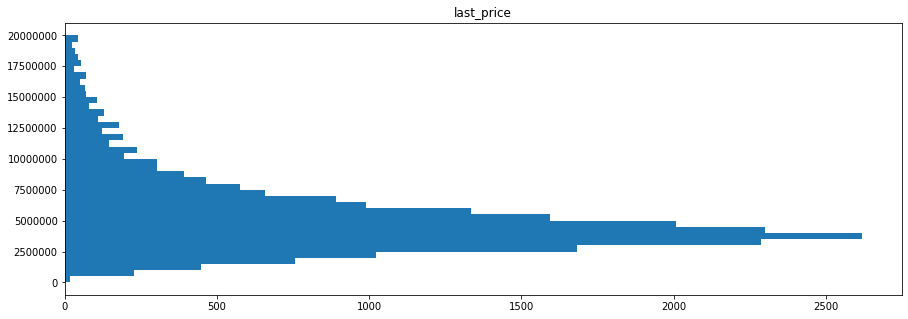

In [64]:
data.hist(['last_price'], figsize=(15, 5), orientation="horizontal", grid=False, range=(20,20000000), bins=40)
plt.ticklabel_format(axis = 'y', style = 'plain')

Такое распределение говорит о том, что объявления по квартирам с меньшей ценой более согласованы между собой и владельцы при размещении ориентируются на общую тенденцию, так как вынуждены подстраиваться под массовость из-за высокой конкуренции в одном ценовом сегменте. 

В то время как в объявлениях на квартиры с большей стоимостью ориентир на конкурентов идёт в меньшей степени, что приводит к более заметному разбросу цен при одинаковой площади объекта.

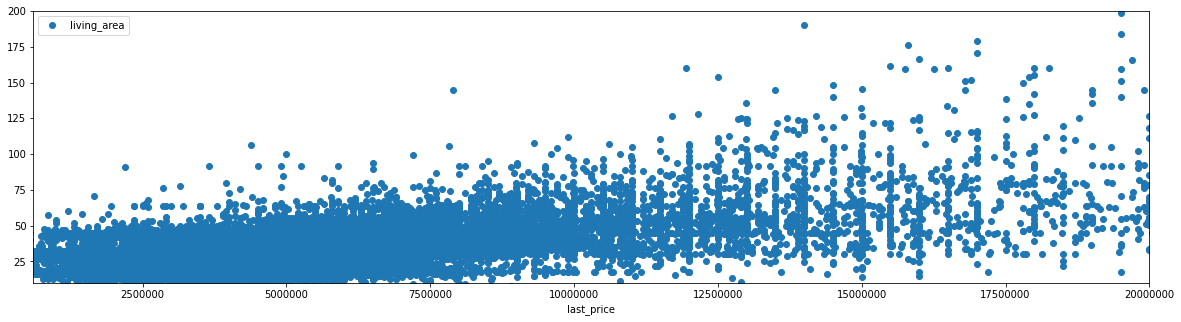

In [65]:
data.plot(x='last_price', y='living_area', figsize=(20,5), style='o', xlim=[600000,20000000], ylim=[10,200])
plt.ticklabel_format(axis = 'x', style = 'plain')

График распределения стоимости соответствует и графикам по площадям, по которым видно, что наибольшую часть объявлений составляют квартиры с площадью 20-50 кв. м - студии и квартиры с 2-3 комнатами (зависит от планировки). 

Квартиры же с высокой ценой, а значит и с большой площадью есть, но гораздо меньше.

array([[<AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>, <AxesSubplot:>]],
      dtype=object)

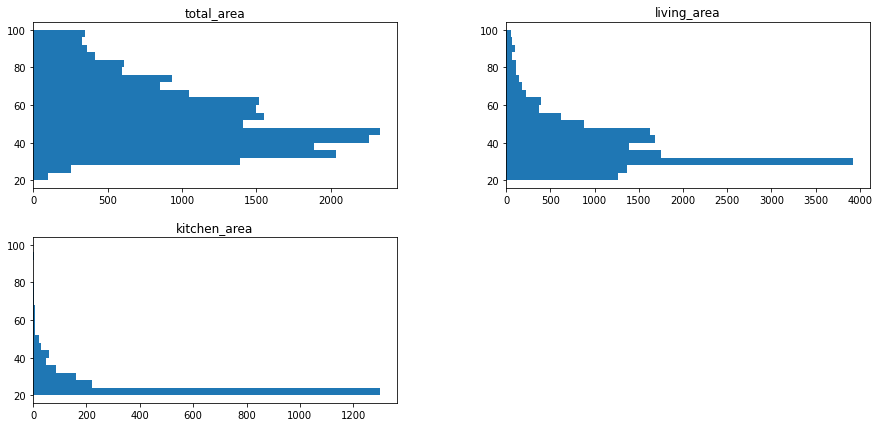

In [66]:
data.hist(['total_area', 'living_area', 'kitchen_area'], figsize=(15, 7), orientation="horizontal", grid=False, range=(20,100), bins=20)

#### Комнаты, высота потолков

График по комнатам ещё раз подтверждает предыдущие гистограммы, а также по нему можно увидеть уточнение комнатности. Объявлений с двумя комнатами всё-таки больше, чем с тремя.

Что касается высоты потолков, то они, в основном, стандартные - около 2.7 м. Потолков выше 3 метров значительно меньше, а выше 3.5 - практически исключение.

array([[<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

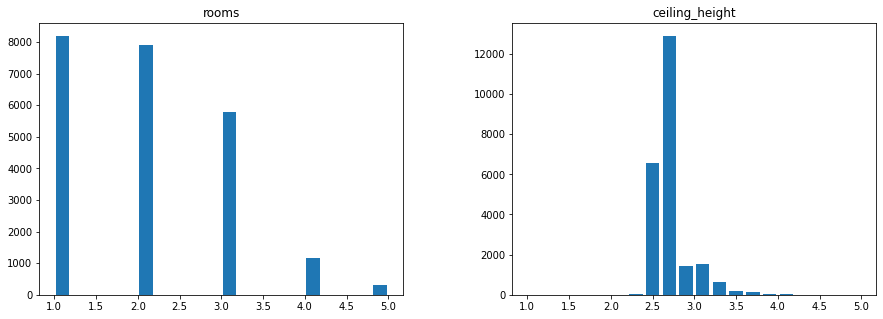

In [67]:
data.hist(['rooms', 'ceiling_height'], figsize=(15, 5), grid=False, range=(1,5), bins=20, rwidth=0.8)

#### Этажность

Общая этажность дома в объявлениях ожидаема: наиболее распространены дома в 5 и 9-10 этажей. Домов меньше 5 этажей гораздо меньше, но при этом их немногим больше, чем домов с нестандартной этажностью: 7, 8, 23 этажа и т.д.

Соответственно, общая этажность влияет и на частотность этаж расположения квартиры. Так как больше домов с 5 и 9-10 этажами (которые тоже имеют 5 этаж), то и квартир больше на 1-5 этажах.

array([[<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

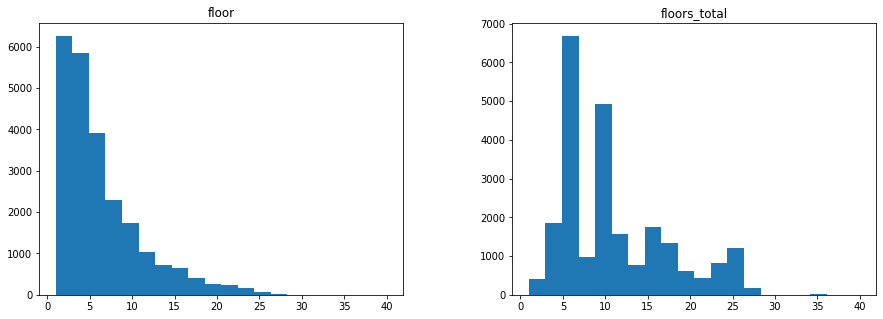

In [68]:
data.hist(['floor', 'floors_total'], figsize=(15, 5), grid=False, range=(1,40), bins=20)

Если же говорить точнее, то наиболее популярными являются квартиры на 2 и 3 этаже.

In [69]:
data.groupby('floor')['floor'].count().sort_values(ascending=False).head(5)

floor
2    3351
3    3061
1    2909
4    2792
5    2612
Name: floor, dtype: int64

Что касается типов этажей, то лидер полностью ожидаем: самый часто встречаемый тип "другой", т.к. в одном доме может продаваться несколько квартир на разных этажах.

Между первым и последним этажом объявлений больше на последнем этаже.

<AxesSubplot:xlabel='floor_type'>

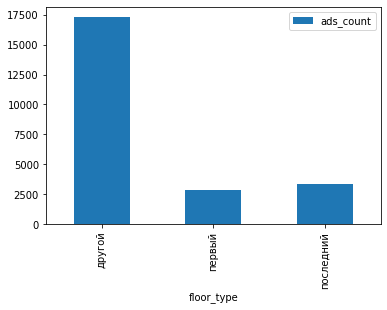

In [70]:
data.groupby('floor_type').agg(ads_count = ('floor', 'count')).plot(kind='bar')

### Дополнительные параметры: расстояния, время публикации

#### Расстояния

Что касается расстояний, то типичная картина следующая:
- До центра города ближе, чем до аэпорорта
 - до центра 10-15 км, до аэропорта 25-30 км
- До водоёма и парка ближе, чем до центра города
 - примерно 400-600 метров

array([[<AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

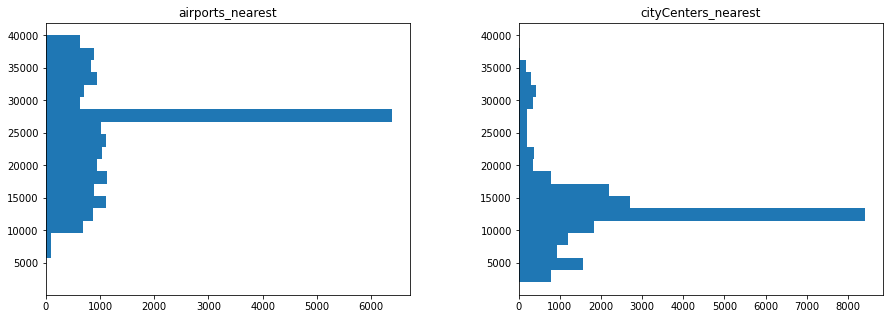

In [71]:
data.hist(['airports_nearest', 'cityCenters_nearest'], figsize=(15, 5), orientation="horizontal", grid=False, bins=20, range=(2000,40000))

array([[<AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>]], dtype=object)

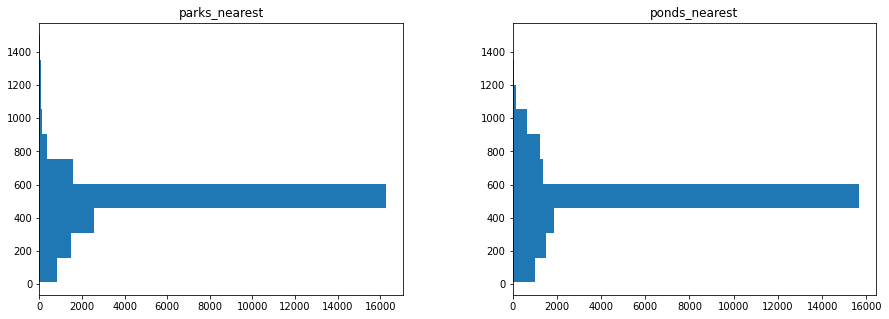

In [72]:
data.hist(['parks_nearest', 'ponds_nearest'], figsize=(15, 5), orientation="horizontal", grid=False, bins=10, range=(10,1500))

В некоторых случаях до водоёмов всё же ближе, чем до парка
- самый дальний водоём находится от квартиры на расстоянии 1.3 км, в то время как расстояния до парка могут достигать 3.1 км
- в объявлении с самым дальним парком (3.1 км) расстояние до водоёма 430 м

Общая же тенденция такова, что или парк с водоёмом будут примерно на одинаковом расстоянии от квартиры, или будут обратно пропорциональны: чем ближе до парка, тем дальше водоём и наоборот.

[Text(0, 0.5, 'Расстояние до водоёма'), Text(0.5, 0, 'Расстояние до парка')]

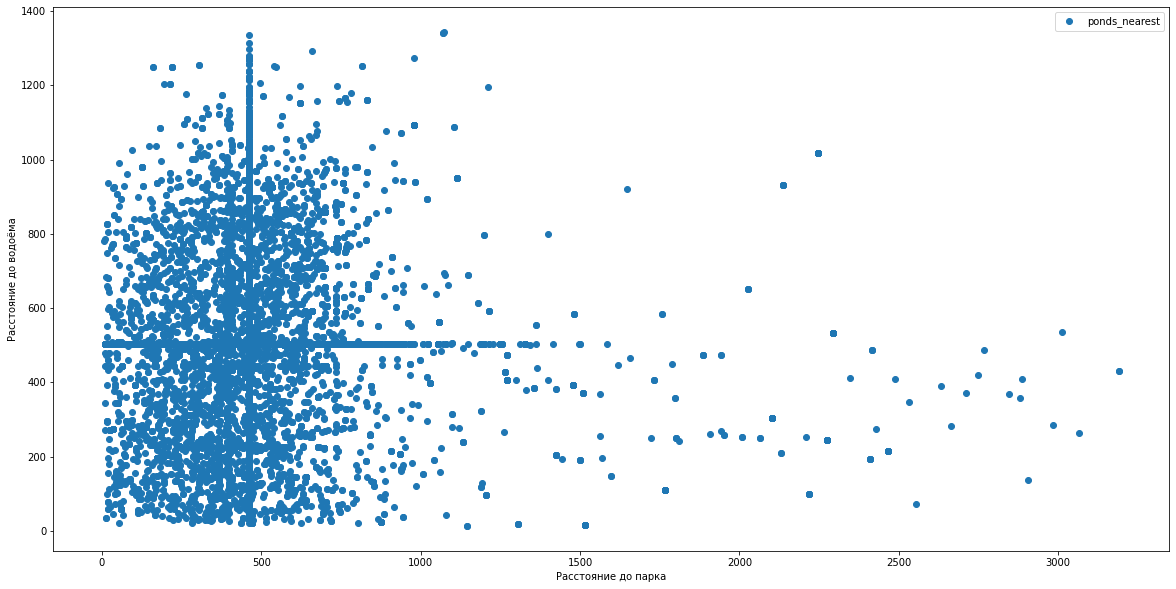

In [73]:
data.plot(x='parks_nearest', y='ponds_nearest',figsize=(20,10), style='o').set(ylabel='Расстояние до водоёма', xlabel='Расстояние до парка')

#### Дата объявления

Большинство объявлений опубликовано в рабочие дни, пик приходится на вторник и четверг. Скорее всего, большая часть объявлений размещена риэлторами и агенствами, поэтому распределение выглядит логичным: в понедельник начинается рабочая неделя и разбор дел, а во вторник как раз можно уже размещать накопленное. Далее снова разбор дел, звонки и встречи, после чего - размещение объявлений.

По месяцам - чаще объявления размещались в феврале и марте, вторыми по популярности являются апрель и ноябрь.


array([[<AxesSubplot:title={'center':'weekday_exposition'}>,
        <AxesSubplot:title={'center':'month_exposition'}>]], dtype=object)

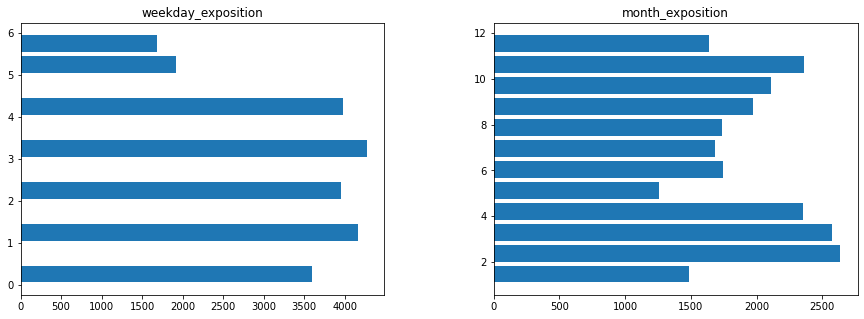

In [74]:
data.hist(['weekday_exposition', 'month_exposition'], figsize=(15, 5), orientation="horizontal", bins=12, grid=False, rwidth=0.8)

### Длительность продажи квартиры

Минимально объявление было активно 1 день, максимально 4 года. В среднем квартира продаётся за полгода, а по медианному значению - за 3.5 месяца.

In [75]:
data['days_exposition'].agg({'max', 'min', 'median', 'mean'})

mean       180.748774
max       1580.000000
median      95.000000
min          1.000000
Name: days_exposition, dtype: float64

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

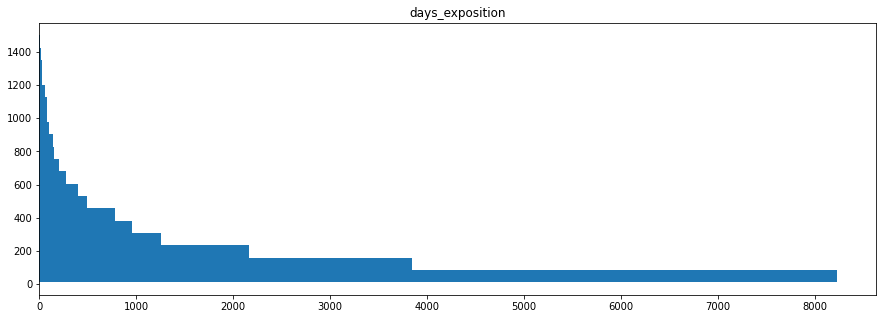

In [76]:
data.hist(['days_exposition'], figsize=(15, 5), orientation="horizontal", grid=False, bins=20, range=(10,1500))

Квартира продаётся чаще всего быстрее 6 месяцев по той причине, что подавляющее число объявлений сосредоточено в Санкт-Петербурге. Если вернуться к стоимости и размеру квартир в объявлениях, то получается: квартиры находятся примерно в одном ценовом сегменте, они примерно одного размера и находятся в крупном городе федерального значения.

In [77]:
data.groupby('only_locality_name')['only_locality_name'].count().sort_values(ascending=False).head(5)

only_locality_name
Санкт-Петербург    15650
Мурино               586
Кудрово              470
Шушары               439
Всеволожск           398
Name: only_locality_name, dtype: int64

Фактически здесь две гонки на скорость: одна между владельцами объявлений, а вторая между покупателями:
- Объявления примерно на одном уровне и с примерно одинаковыми параметрами, а значит покупатель получает меньше выбора в основных потребностях покупки квартиры.
- Покупатель же, который хотел бы жить в Санкт-Петербурге, иметь квартиру не больше 2 комнат и с бюджетом до 7.5 млн оказывается с огромным количеством объявлений и начинает обращать внимание на вторичные потребности: инфраструктура, ремонт и т.д. 

В итоге владельцы в объявлениях популярного сегмента должны следить за конкурирующими объявлениями и поддерживать общую планку, а покупатели оказываются готовы к покупке подходящей квартиры быстрее, т.к. имеют широкий выбор и конкурентов в лице таких же покупателей, желающих иметь собственность в культурной столице.

Соответственно, объявления, выбивающиеся из общей массы, и находятся дольше всего в активном состоянии:
- Самое долгое размещение было у квартиры в деревне Новое Девяткино - она находится рядом с Мурино, где бытует мнение о неблагополучности района и района с высоким количеством суицидов
- Следующими по длительности являются квартиры в Санкт-Петербурге, но их площадь и стоимость значительно выше основной массы объявлений

In [78]:
data[['only_locality_name', 'days_exposition', 'last_price', 'total_area']].sort_values(by='days_exposition', ascending=False).head(5)

,only_locality_name,days_exposition,last_price,total_area
18737,Новое Девяткино,1580,3500000,48.2
1104,Санкт-Петербург,1572,34878556,95.8
9506,Санкт-Петербург,1553,10600000,80.0
1879,Санкт-Петербург,1513,13300000,79.6
20850,Санкт-Петербург,1512,13300000,133.0


Обратная же ситуация, как и предполагалось, в объявлениях, которые близки к общей массе. За 1-3 дня были сняты те объявления, которые расположены в Санкт-Петербурге и, возможно, имеют в пешей доступности станцию метро, а также с площадью до 52 кв.м, что соответствует квартире с не более, чем тремя комнатами.

In [79]:
data[['only_locality_name', 'days_exposition', 'last_price', 'total_area']].sort_values(by='days_exposition').head(5)

,only_locality_name,days_exposition,last_price,total_area
1627,Санкт-Петербург,1,4000000,49.9
15963,Санкт-Петербург,2,4070000,45.1
12986,Санкт-Петербург,2,6100000,51.4
16122,Санкт-Петербург,2,7806000,25.0
17314,Санкт-Петербург,3,2950000,35.0


### Факторы, влияющие на стоимость

Изучим, как влияют на стоимость объекта:
- общая площадь
- жилая площадь
- площадь кухни
- количество комнат
- этаж, на котором расположена квартира (первый, последний, другой)
- дата размещения (день недели, месяц, год)

#### Влияние площади

Площадь влияет на стоимость средне, при этом влияние общей площади на стоимость чуть выше, чем жилой.

In [80]:
data[['last_price', 'living_area', 'total_area', 'kitchen_area']].corr().style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1).set_precision(2)

,last_price,living_area,total_area,kitchen_area
last_price,1.00,0.56,0.65,0.44
living_area,0.56,1.00,0.91,0.41
total_area,0.65,0.91,1.00,0.57
kitchen_area,0.44,0.41,0.57,1.00


Для проверки возьмём квартиру с популярными параметрами: 2-3 комнаты, общая площадь 45 кв.м

Разброс цены находится в диапазоне от 565 тысяч и до 16 млн, где самые дешёвые квартиры находятся на удалении более 100 км от Санкт-Петербурга, а самые дорогие непосредственно в черте культурной столицы.

In [81]:
display(data[['last_price', 'living_area', 'total_area', 'kitchen_area', 'only_locality_name']].query('total_area == 45').sort_values(by='last_price').head(3))
display(data[['last_price', 'living_area', 'total_area', 'kitchen_area', 'only_locality_name']].query('total_area == 45').sort_values(by='last_price').tail(3))

,last_price,living_area,total_area,kitchen_area,only_locality_name
13730,565000,25.0,45.0,9.0,Совхозный
8723,650000,30.0,45.0,6.0,Бокситогорск
23508,660000,31.0,45.0,6.0,Сланцы


,last_price,living_area,total_area,kitchen_area,only_locality_name
3668,9000000,18.0,45.0,10.0,Санкт-Петербург
10139,16000000,17.6,45.0,16.2,Санкт-Петербург
4689,16000000,29.0,45.0,7.0,Санкт-Петербург


Чем больше площадь - тем сильнее разброс по стоимости, при этом колебания между жилой площадью и ценой более заметны, чем колебания между общей площадью и ценой. То есть в объявлениях по общей площади увеличение цены идёт равномерно, а по жилой площади владельцы объявлений могут варьировать цену в более свободном диапазоне.

При больших площадях разброс ожидаем, поэтому стоит обратить внимание на квартиры до 30 кв.м. Так как данные квартиры относятся в подавляющем большинстве к студиям и однокомнатным, то причиной колебания в отношении *жилая площадь - стоимость* могут выступать вопросы зонирования:
- застройщики новых ЖК строят типовые студии в одном доме с разными площадями, которые могут иметь разницу до 5 кв.м. Разница образуется из-за разной площади зон (лоджии или балконы, прихожая, ванная комната, кухня), что в свою очередь приводит к уменьшению или увеличению полезной - *жилой* - площади. Соответственно владельцы объявлений типовых квартир могут больше варьировать цену при меньшем общем количестве квадратных метров, пользуясь только разницей планировки.
- во вторичном жилье есть аналогичная ситуация, только зонированием занимается владелец квартиры. В данном случае образуются двухуровневые студии, где второй этаж учитывается как спальня и добавляется в объявлении как зона жилой площади. Таким образом, опять же в одном доме с одинаковым размещением несущих стен, возникает разница по жилой площади за счёт внутреннего зонирования квартиры.

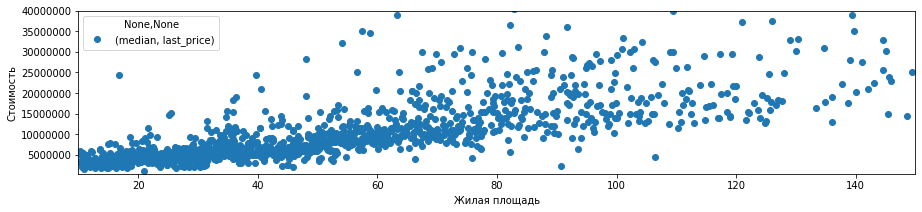

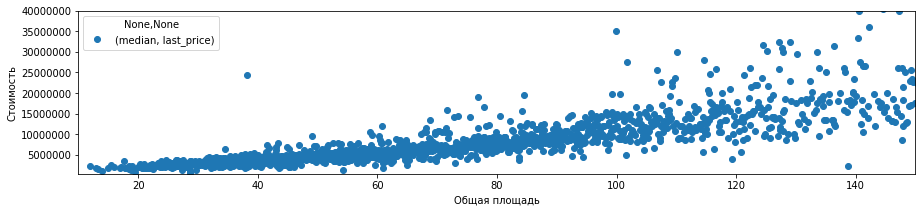

In [82]:
data.pivot_table(index='living_area', values='last_price', aggfunc=['median']).plot(figsize=(15,3), style='o', xlim=[10,150], ylim=[400000,40000000]).set(xlabel='Жилая площадь', ylabel='Стоимость')
plt.ticklabel_format(axis = 'y', style = 'plain')

data.pivot_table(index='total_area', values='last_price', aggfunc=['median']).plot(figsize=(15,3), style='o', xlim=[10,150], ylim=[400000,40000000]).set(xlabel='Общая площадь', ylabel='Стоимость')
plt.ticklabel_format(axis = 'y', style = 'plain')

#### Влияние количества комнат

Некоторое влияние количества комнат на стоимость квартиры есть, однако оно становится заметнее на многокомнатных квартирах и менее видно на квартирах до 3 комнат.

При этом влияние комнатности на стоимость объекта ниже, чем площади, что может быть связано опять же с планировками квартир, где объявления с одной площадью могут иметь разное количество комнат.

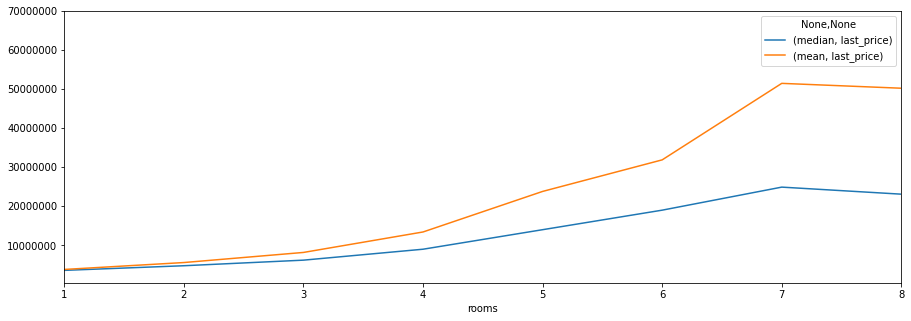

In [140]:
data.pivot_table(index='rooms', values='last_price', aggfunc=['median', 'mean']).plot(figsize=(15,5), style='-', ylim=[400000,70000000], xlim=[1,8])
plt.ticklabel_format(axis = 'y', style = 'plain')

Коэффициент корреляции подтверждает меньшее влияние - 0.37 (комнаты/цена) против 0.65 (общая площадь/цена).

In [130]:
data[['last_price', 'rooms', 'total_area']].corr().style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1).set_precision(2)

,last_price,rooms,total_area
last_price,1.00,0.37,0.65
rooms,0.37,1.00,0.76
total_area,0.65,0.76,1.00


Тем не менее какая-то часть объявлений собирается в небольшие группы - это как раз та часть квартир, имеющих не более 3 комнат и участвующих в основном сегменте конкуренции. Но общая картина такова, что квартиры с 4 комнатами могут стоить меньше 5 млн, квартиры с 2 комнатами - больше 15 млн и т.д.

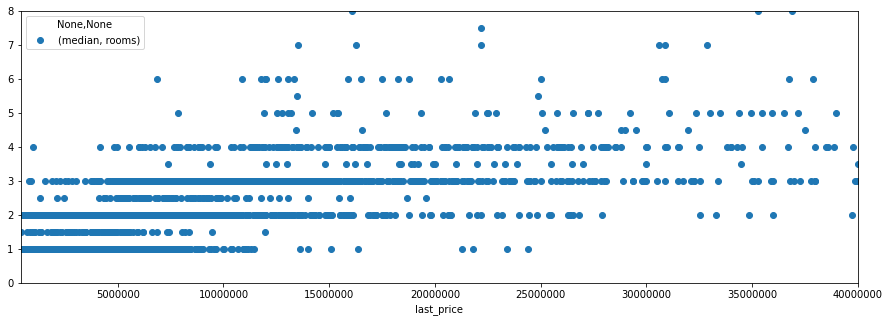

In [139]:
data.pivot_table(index='last_price', values='rooms', aggfunc=['median']).plot(figsize=(15,5), style='o', xlim=[400000,40000000], ylim=[0,8])
plt.ticklabel_format(axis = 'x', style = 'plain')

Для проверки посмотрим объявления с самой высокой и самой низкой стоимостью, указав жилую площадь одинаковой - 38 кв.м.

Среди 159 объявлений разброс цены варьируется от 740 тысяч и до 45 млн, а количество комнат при 38 кв.м колеблется в диапазоне от 2 до 5. 

In [85]:
display(data[['last_price', 'living_area', 'rooms']].query('living_area == 38').sort_values(by='last_price').describe().round(0))

,last_price,living_area,rooms
count,159.0,159.0,159.0
mean,5981073.0,38.0,3.0
std,3991596.0,0.0,1.0
min,740000.0,38.0,2.0
25%,4075000.0,38.0,2.0
50%,5200000.0,38.0,3.0
75%,6974500.0,38.0,3.0
max,45000000.0,38.0,5.0


#### Влияние этажа

Что касается влияния этажа на стоимость квартиры, то если посмотреть медиану, будет заметно, что не первый и не последний этаж являются фактором для повышения стоимости.

Причины снижения стоимости квартир могут быть следующие:
- Последний этаж:
 - высокий риск протечек, особенно в домах старых, где гидроизоляция кровли и стыков разрушается
 - неработающие лифты - пеший подъём по лестнице, что может быть затруднительным при расположении квартир на 9 и выше этажах
 - долгосрочная перспектива - грузчики и доставка часто обращают внимание на этаж, добавляя дополнительную стоимость за каждый этаж. Соответственно, последний этаж всегда будет самым дорогим
- Первый этаж:
 - повышенный риск подвергнуться грабежу, т.к. для высота первого этажа не станет препятствием для взлома и проникновения через окно
 - повышенный уровень шума: люди входят и выходят из подъезда, перемещаются на лифте и т.д
 - в старых домах также может разрушаться гидроизоляция, что приводит к протечкам в подвальных помещениях и постепенному разрушению фундамента. Влияет это, в первую очередь, именно на первые этажи, где появляется сильно выраженный запах затхлости

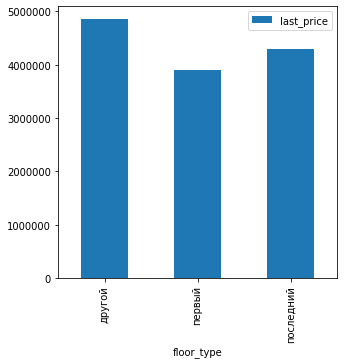

In [86]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(kind='bar', figsize=(5,5))
plt.ticklabel_format(axis = 'y', style = 'plain')

Заметной связи между этажом и стоимости квартиры нет, выбросы есть вне зависимости от этажа. На 2-10 этажах разброс немного уменьшается, но остаётся заметным.

Если же вернуться к количеству объявлений, то лидерами были объявления о квартирах на 1-3 этаже. Но при этом если посмотреть на 1 этаж, например, то видно, что в объявлениях сильный разброс стоимости. 

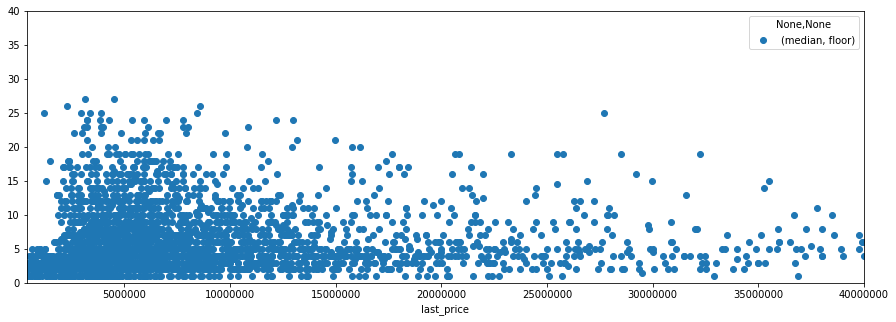

In [137]:
data.pivot_table(index='last_price', values='floor', aggfunc=['median']).plot(figsize=(15,5), style='o', xlim=[400000,40000000], ylim=[0,40])
plt.ticklabel_format(axis = 'x', style = 'plain')

Ранее был получен факт, что медиана цен на квартиры на 1 этаже ниже, чем на остальных. Поэтому для подтверждения слабой связи между этажом и стоимостью выбран именно 1 этаж.

Среди 2909 объявлений с квартирами на 1 этаже видно, что цена начинается от 430 тысяч для объектов в небольших поселениях и заканчивается на 135 млн, указанной для квартиры в Санкт-Петербурге.

In [88]:
display(data[['last_price', 'floor', 'locality_name']].query('floor == 1').sort_values(by='last_price'))

,last_price,floor,locality_name
17357,430000,1,Сланцы
16184,440000,1,деревня Старополье
16129,450000,1,деревня Вахнова Кара
5669,450000,1,городской посёлок Будогощь
15942,480000,1,Сланцы
...,...,...,...
6353,51000000,1,Санкт-Петербург
18528,55900000,1,Санкт-Петербург
2061,77000000,1,Санкт-Петербург
15064,88000000,1,Санкт-Петербург


#### Влияние даты размещения

Объявления на квартиры с более дорогой стоимостью появляются в начале недели, что соответствует раннее построенным графикам, где количество объявлений было наибольшим во вторник и четверг. Связь следующая: в выходные объявления размещаются неактивно и по меньшей стоимости - чтобы быть заметнее, соответственно объявления, которые уже есть оказываются выше новых по стоимости. Но так как разброс цен в одном ценовом сегменте большим быть не может, то и колебания в итоге по дням не особо большие.

Что касается месяца размещения - больше объявлений размещается в феврале и ноябре, но вот медианная стоимость выше в апреле. Небольшие скачки дублируются и средним значением.
Расхождения среднего значения заметны только в субботу и сентябре, что соответствует дате появления объявления с самой высокой ценой в 763 млн, которое было опубликовано как раз 30 сентября 2017 года.

По годам - наибольшая медианная стоимость была в 2014, после чего наблюдались как падения, так и рост.

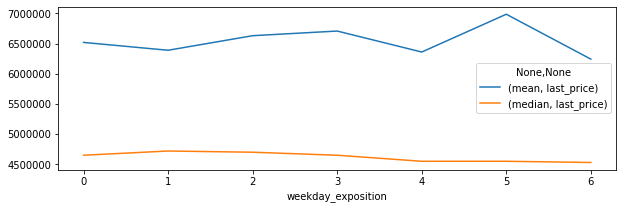

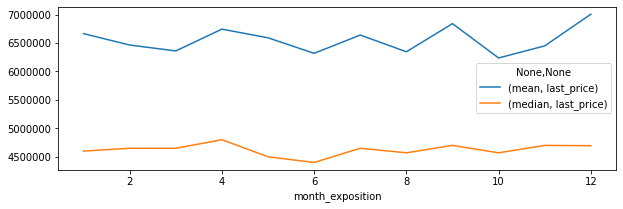

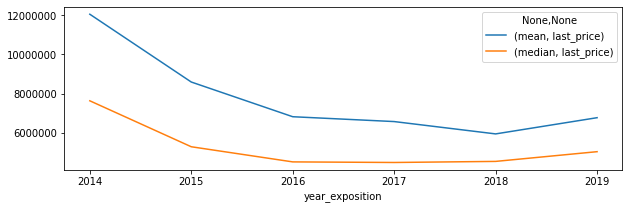

In [89]:
data.pivot_table(index='weekday_exposition', values='last_price', aggfunc=['mean', 'median']).plot(figsize=(10,3))
plt.ticklabel_format(axis = 'y', style = 'plain')

data.pivot_table(index='month_exposition', values='last_price', aggfunc=['mean', 'median']).plot(figsize=(10,3))
plt.ticklabel_format(axis = 'y', style = 'plain')

data.pivot_table(index='year_exposition', values='last_price', aggfunc=['mean', 'median']).plot(figsize=(10,3))
plt.ticklabel_format(axis = 'y', style = 'plain')

В общих же чертах, можно говорить о том, что сильного влияния на стоимость квартиры ни день, ни месяц размещения не оказывают.

In [90]:
data[['last_price', 'weekday_exposition', 'month_exposition', 'year_exposition']].corr().style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1).set_precision(2)

,last_price,weekday_exposition,month_exposition,year_exposition
last_price,1.00,0.00,0.00,-0.04
weekday_exposition,0.00,1.00,0.01,-0.00
month_exposition,0.00,0.01,1.00,-0.27
year_exposition,-0.04,-0.00,-0.27,1.00


В любой день недели и в любой месяц могут находиться объявления стоимостью как меньше 2.5 млн, так и выше 35 млн. Тот факт, что в какой-то из дней или месяцев не было квартиры определённой стоимости (например, в декабре не было объявлений стоимостью 40 млн) говорит не о влиянии даты публикации на стоимость, а о редкости самого типа объявлений.

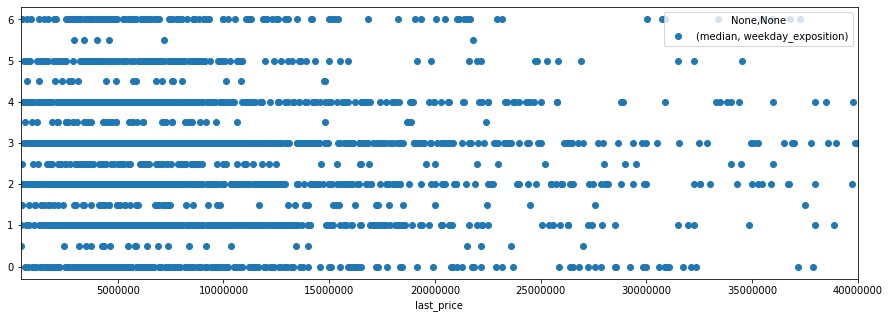

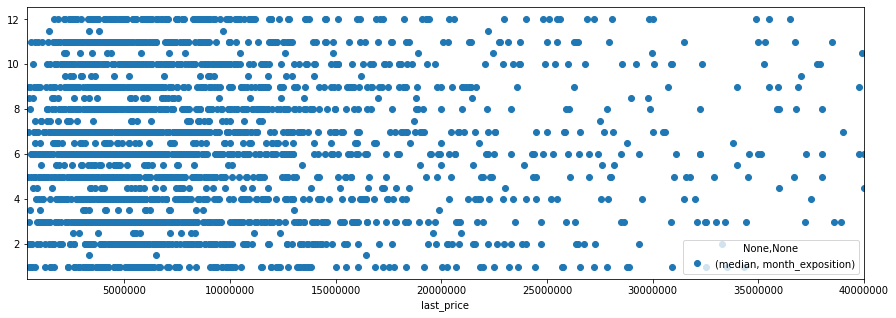

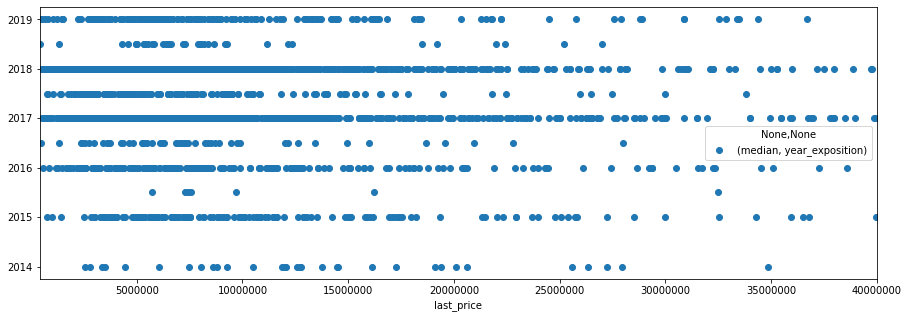

In [160]:
data.pivot_table(index='last_price', values='weekday_exposition', aggfunc=['median']).plot(figsize=(15,5), style='o', xlim=[400000,40000000])
plt.ticklabel_format(axis = 'x', style = 'plain')

data.pivot_table(index='last_price', values='month_exposition', aggfunc=['median']).plot(figsize=(15,5), style='o', xlim=[400000,40000000])
plt.ticklabel_format(axis = 'x', style = 'plain')

data.pivot_table(index='last_price', values='year_exposition', aggfunc=['median']).plot(figsize=(15,5), style='o', xlim=[400000,40000000])
plt.ticklabel_format(axis = 'x', style = 'plain')

#### Влияние расстояния до центра

Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену квартиры на каждом километре удаления от центра.

Разброс стоимости получается следующим: квартиры в центре Санкт-Петербурга в среднем стоят 31.5 млн, в то время как для квартир с расстоянием более 20 км средняя цена становится ниже 6 млн.

In [91]:
data[data['locality_name'] == 'Санкт-Петербург'].pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean').astype(int).sort_values(by='last_price', ascending=False)

,last_price
cityCenters_nearest_km,
0,31449115
1,21206720
2,17788319
6,15338418
7,14775152
5,14455995
4,13304279
3,11137394
8,9949111


Как и следовало ожидать, самые дорогие квартиры Санкт-Петербурга - в центре города. Транспортная и социальная инфраструктура, развлекательные комплексы и торговые сети - их концентрация в центре любого города всегда выше, чем на окраинах, так что исключения нет и в этот раз.

На расстоянии от центра в 1-2 км цена объекта в среднем падает примерно на четверть, а после 7 км - почти вдвое.

Выбивается из общего спада 27 км, так как именно в нём сосредоточено большее количество объявлений с локацией в Пушкине. Несмотря на удалённость от центра Санкт-Петербурга, недвижимость здесь может предложить и городскую прописку, и две знаковые достопримечательности - Царское село и Павловский парк.

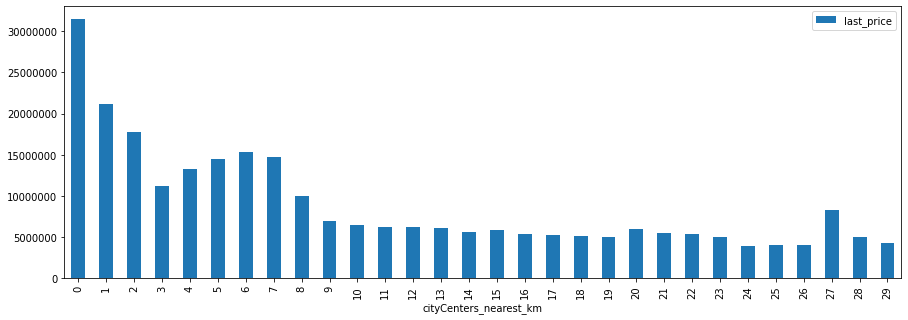

In [92]:
data[data['locality_name'] == 'Санкт-Петербург'].pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(15,5))
plt.ticklabel_format(axis = 'y', style = 'plain')

Именно расстояние до центра имеет наибольшее влияние на стоимость квартиры - если в 10 км до центра города квартиры стоимостью выше 40 млн не являются исключением, то чем дальше, тем ниже общая стоимость. На расстоянии после 20 км становятся исключением квартиры стоимостью выше 30 млн, после 40 км - выше 20 млн, а на удалении 60 км от центра стоимость квартир не превышает 10 млн.

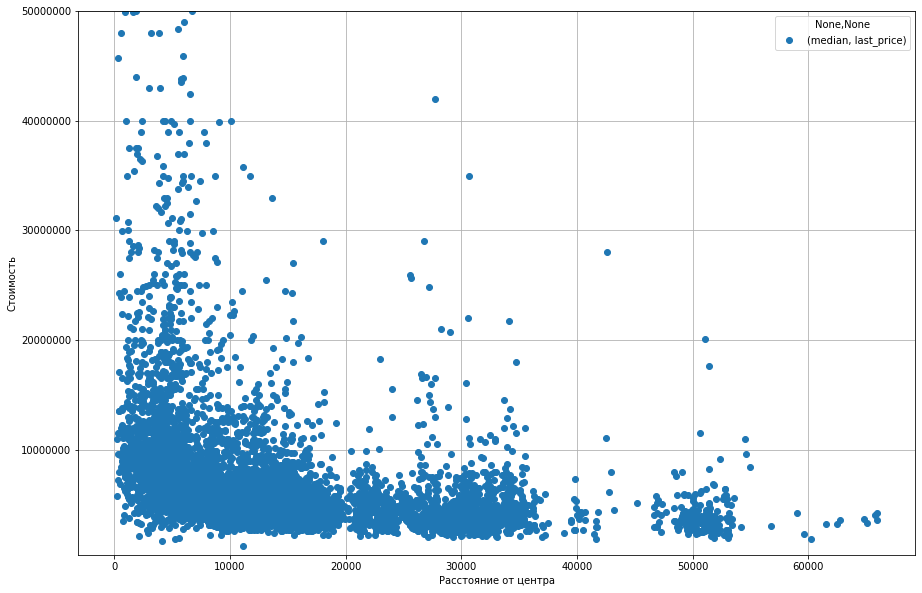

In [93]:
data.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc=['median']).plot(figsize=(15,10), style='o', ylim=[400000,50000000], grid=True).set(xlabel='Расстояние от центра', ylabel='Стоимость')
plt.ticklabel_format(axis = 'y', style = 'plain')

## Общий вывод

Локация:
- В Санкт-Петербурге довольно дорогая недвижимость и стоимость её значительно увеличивается по мере приближения к центру 
города.
- Продать квартиру в Санкт-Петербурге не составит проблем. Объявления редко висят активными больше 6 месяцев.
- Сложнее продать квартиры стоимостью выше 7.5 млн и не в Санкт-Петербурге.

Параметры объекта:
- Количество комнат не сильно связано с общей площадью квартиры и не сильно влияет на стоимость в объявлении.
- Первый и последний этаж расположения квартиры влияет на стоимость квартиры как фактор снижения
- Несмотря на то, что в выходные дни объявлений размещается меньше и есть шанс быть чуть заметнее, надежда на привлечение внимания может не сработать, т.к. именно в выходные стоимость в объявлениях ниже, чем в будни.
- Близость парка и водоёма не может быть важным преимуществом объекта, так как у большинства объявлений что-либо из этого находится в пределах 600 м
- Преимуществом же может быть высота потолков более 3 м - подобных объектов немного, при этом такая высота позволит сделать второй уровень и увеличить полезное пространство

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Юлия, проведен основательный и подробный анализ. Все наглядно - графики и гистограммы подтверждают обоснованные выводы.

</div>
